# EDA

* Start EDA here.... 

In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root = 'data/'

## Circuits

In [46]:
circuits = pd.read_csv(root+'circuits.csv')

In [47]:
circuits.shape

(77, 9)

In [48]:
circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [49]:
hosting_countries = circuits['country'].unique()

In [50]:
hosting_countries

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'China', 'Brazil', 'USA', 'United States',
       'UAE', 'Argentina', 'Portugal', 'South Africa', 'Mexico', 'Korea',
       'Netherlands', 'Sweden', 'Austria', 'Morocco', 'Switzerland',
       'India', 'Russia', 'Azerbaijan', 'Saudi Arabia', 'Qatar'],
      dtype=object)

In [51]:
circuits.loc[circuits['country'] == 'United States', 'country'] = 'USA'

In [52]:
hosting_countries = circuits['country'].unique()

In [53]:
hosting_countries

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'China', 'Brazil', 'USA', 'UAE', 'Argentina',
       'Portugal', 'South Africa', 'Mexico', 'Korea', 'Netherlands',
       'Sweden', 'Austria', 'Morocco', 'Switzerland', 'India', 'Russia',
       'Azerbaijan', 'Saudi Arabia', 'Qatar'], dtype=object)

> Contains data about countires that have hosted F1 races

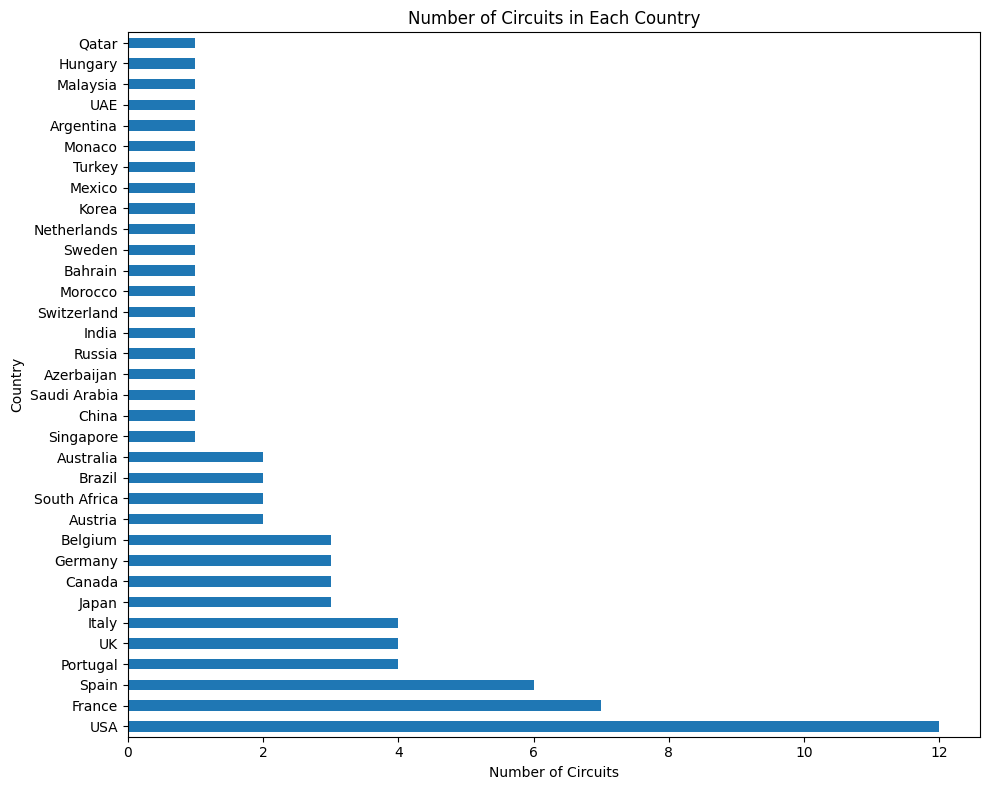

In [54]:
circuit = pd.DataFrame(circuits, columns=['country'])
# Counting how many times each country has hosted an F1 race
country_counts = circuit['country'].value_counts()

# Plotting
plt.figure(figsize=(10,8))
country_counts.plot(kind='barh')
plt.xlabel('Number of Circuits')
plt.ylabel('Country')
plt.title('Number of Circuits in Each Country')
plt.tight_layout()
plt.show()

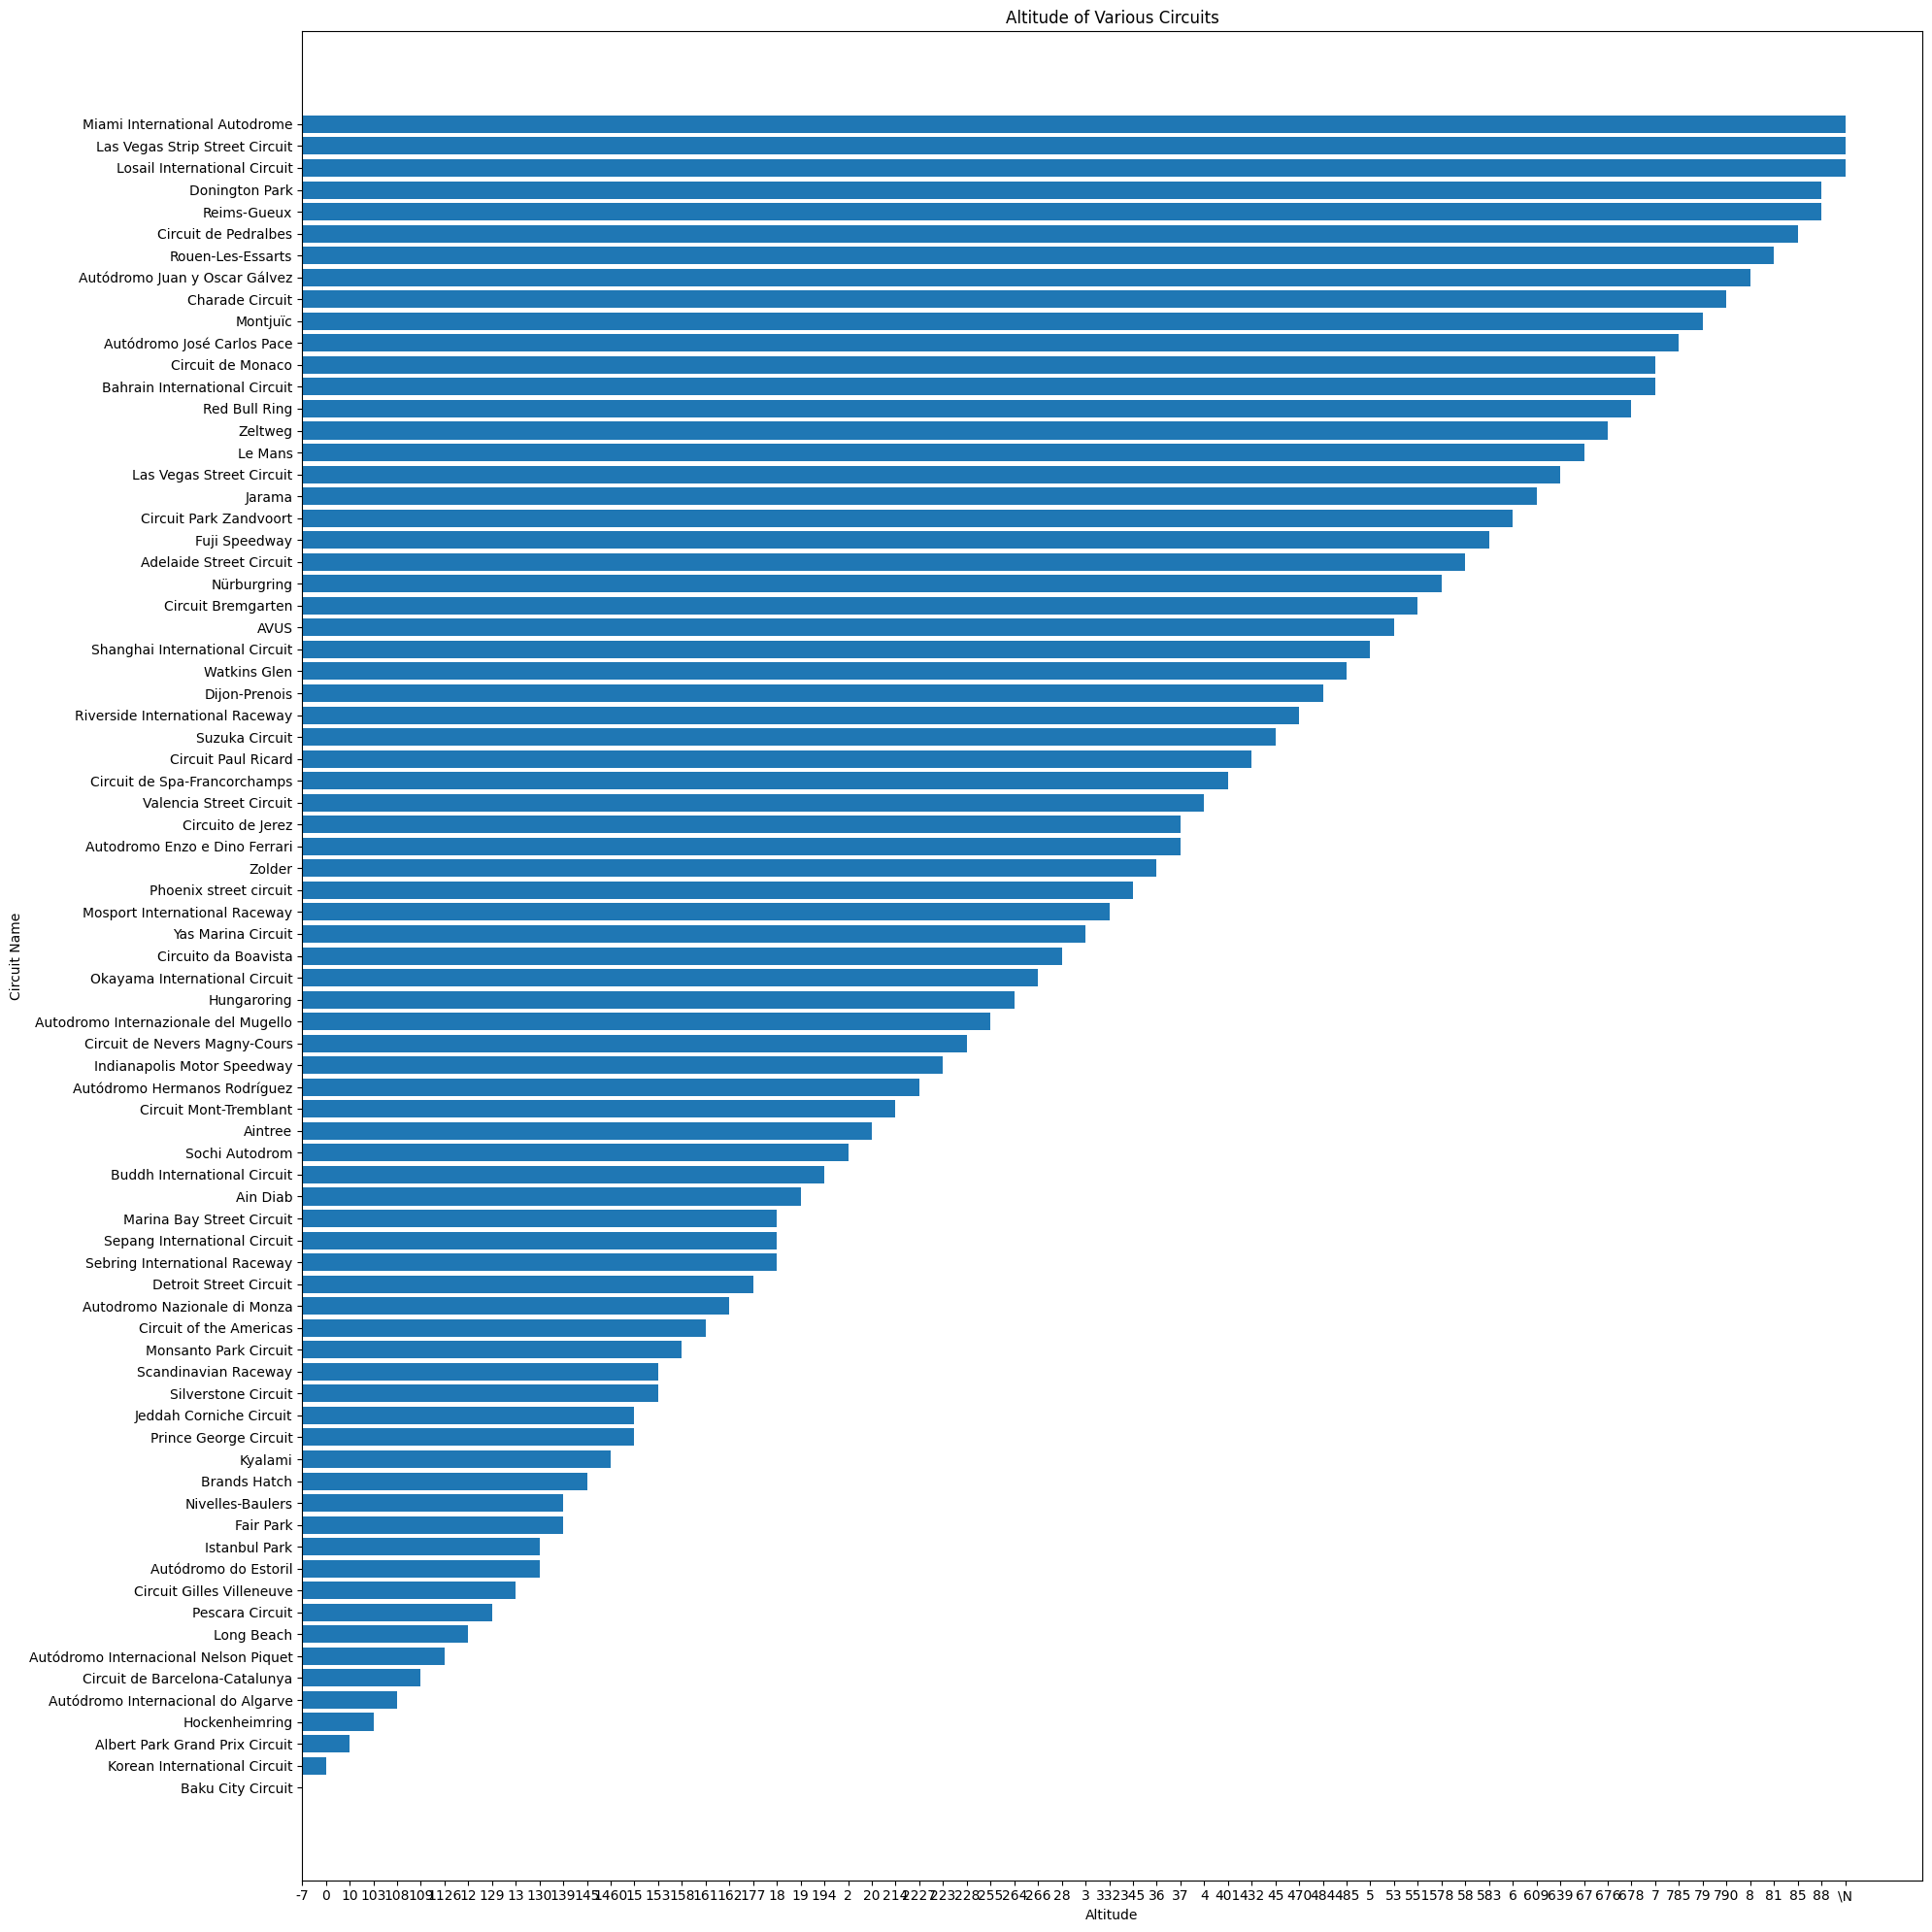

In [62]:
circuits_df_sorted = circuits.sort_values('alt', ascending=True)

# Plotting
plt.figure(figsize=(20, 20))
plt.barh(circuits_df_sorted['name'], circuits_df_sorted['alt'])
plt.xlabel('Altitude')
plt.ylabel('Circuit Name')
plt.title('Altitude of Various Circuits')
plt.tight_layout()
plt.show()

In [ ]:
# compare which car performed the best, wins vs teams 

## constructor_results, constructor_standings, constructors

In [11]:
constructor_results = pd.read_csv(root+'constructor_results.csv')

In [12]:
constructor_results.head()

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N

In [13]:
constructor_results.shape

(12290, 5)

In [14]:
constructor_standings = pd.read_csv(root+'constructor_standings.csv')

In [15]:
constructor_standings.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [16]:
constructor_standings.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   9,  11,  10,   8,  13,  14,
        17,  16,  15,  18,  19,  21,  22,  20,  24,  25,  26,  27,  29,
        28,  30,  31,  33,  32,  34,  35,  37,  36,  42,  41,  39,  40,
        44,  45,  46,  23,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  60,  59, 204,  61,  62, 182,  64,  63,  65,  66,
        67,  68,  69,  71,  70,  72,  73, 202,  75,  74,  76, 203,  80,
        78,  77,  79,  81,  82,  83,  84, 199, 200, 180, 201,  86, 187,
       198,  85, 191, 196, 167, 197, 183,  89, 190, 194, 195, 170, 176,
       184, 172, 189, 188,  91, 192, 181, 185,  94,  95,  92,  96,  97,
       177, 179, 173,  98,  99, 175,  87, 100, 174, 178, 101, 103, 123,
       118, 106, 169, 117, 105, 171, 104, 125, 127, 113, 168, 124, 193,
        90, 186,  93, 131, 205, 164, 166, 206, 207, 208,  12, 209, 210,
       211, 213, 214])

In [17]:
constructor_standings.shape

(13051, 7)

> constructor_standings.csv already has the data from constructor_results.csv, so we can ignore the dataframe , each conrtructor = 2 cars 

In [18]:
constructors = pd.read_csv(root+'constructors.csv')

In [19]:
constructors.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [21]:
constructors.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 167, 166, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [22]:
constructors.shape

(211, 5)

In [23]:
constructors_merged = pd.merge(constructor_standings, constructors, on='constructorId')

In [24]:
constructors_merged.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       7      19              1    24.0         1   
2                      18      20              1    28.0         3   
3                      29      21              1    34.0         3   
4                      40      22              1    42.0         3   

  positionText  wins constructorRef     name nationality  \
0            1     1        mclaren  McLaren     British   
1            1     1        mclaren  McLaren     British   
2            3     1        mclaren  McLaren     British   
3            3     1        mclaren  McLaren     British   
4            3     1        mclaren  McLaren     British   

                                    url  
0  http://en.wikipedia.org/wiki/McLaren  
1  http://en.wikipedia.org/wiki/McLaren  
2  http://en.wikipedia.org/wiki/McLaren  
3  http://en.wikipedia.org/wiki/McLaren  
4  http://en.wikipedia.org/wiki/McLaren

In [25]:
constructors_merged.shape

(13051, 11)

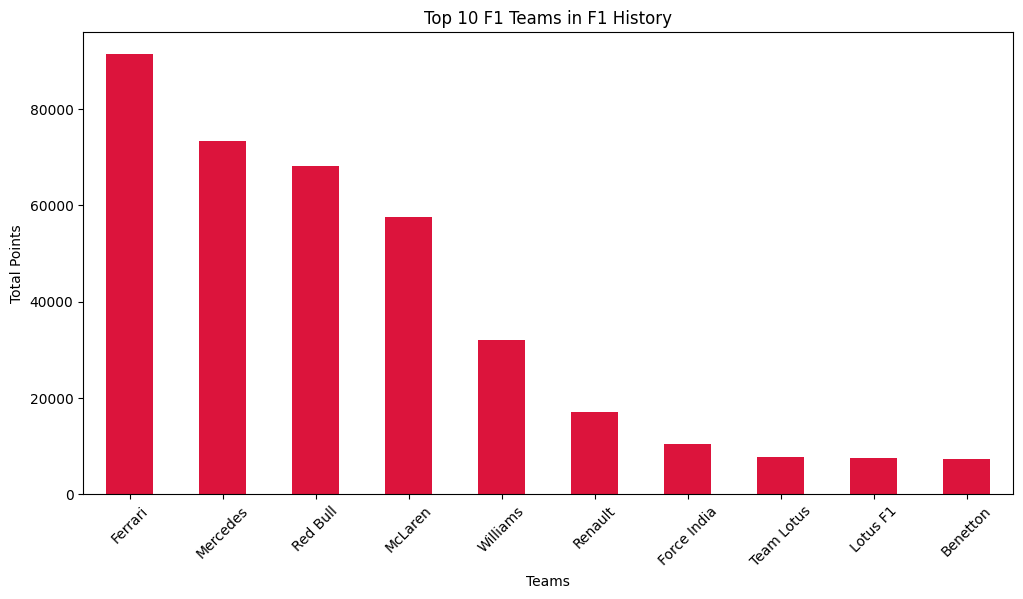

In [26]:
top = constructors_merged.groupby('name')['points'].sum()
top = top.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top.plot(kind='bar', color='crimson')
plt.xlabel('Teams')
plt.ylabel('Total Points')
plt.title('Top 10 F1 Teams in F1 History')
plt.xticks(rotation=45)
plt.show()

/var/folders/1q/p62jltqs1g10s6hzbjjqmw8c0000gq/T/ipykernel_38151/1267466812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='races', y='name', data=teams, palette='rocket')


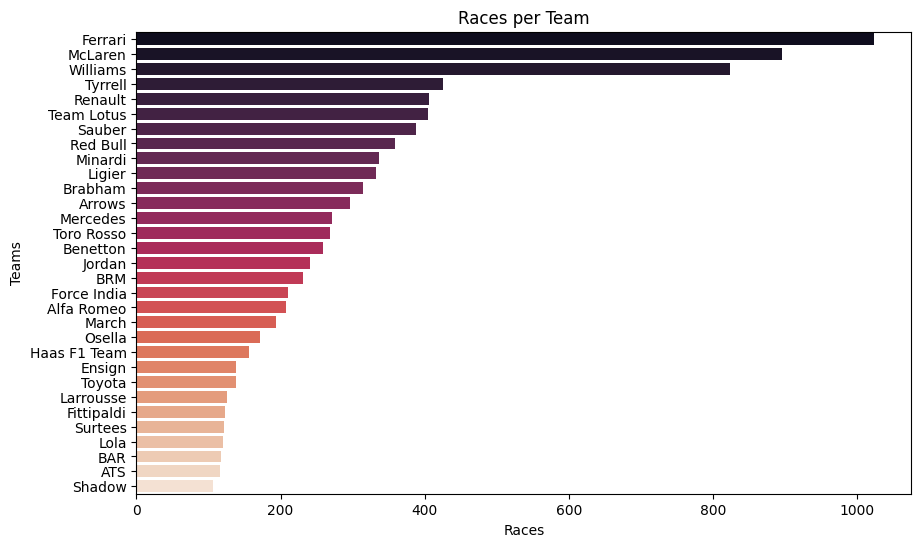

In [27]:
teams = constructors_merged[['name','points','raceId']]
teams = teams.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
teams = teams[teams['races'] >= 100]
plt.figure(figsize=(10, 6))
sns.barplot(x='races', y='name', data=teams, palette='rocket') 
plt.xlabel('Races')  
plt.ylabel('Teams')  
plt.title('Races per Team')  
plt.show()

In [67]:
races = pd.read_csv(root+'races.csv')

In [68]:
races.shape

(1101, 18)

In [69]:
constructors_merged.shape

(13051, 11)

In [70]:
plot_points = pd.merge(constructors_merged, races, on='raceId')

In [71]:
plot_points.shape

(13051, 28)

In [73]:
plot_points.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'constructorRef', 'name_x',
       'nationality', 'url_x', 'year', 'round', 'circuitId', 'name_y', 'date',
       'time', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time'],
      dtype='object')

In [74]:
plot_points_2 = pd.merge(plot_points, circuits, on='circuitId')

In [75]:
plot_points_2.shape

(13051, 36)

In [77]:
plot_points_2.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'constructorRef', 'name_x',
       'nationality', 'url_x', 'year', 'round', 'circuitId', 'name_y', 'date',
       'time', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'circuitRef', 'name', 'location', 'country', 'lat',
       'lng', 'alt', 'url'],
      dtype='object')

In [79]:
plot_points_2.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins constructorRef      name_x nationality  ... sprint_date  \
0            1     1        mclaren     McLaren     British  ...          \N   
1            3     0     bmw_sauber  BMW Sauber      German  ...          \N   
2            2     0       williams    Williams     British  ...          \N   
3            4     0        renault     Renault      French  ...          \N   
4            5     0     toro_rosso  Toro Rosso     Italian  ...          \N   

   sprint_time   circuitRef                            name   location  \
0           \N  albert_park  Albert Park Grand Prix Circuit  Melbourne   
1           \N  albert_park  Albert Park Grand Prix Circuit  Melbourne   
2           \N  albert_park  Albert Park Grand Prix Circuit  Melbourne   
3           \N  albert_park  Albert Park Grand Prix Circuit  Melbourne   
4           \N  albert_park  Albert Park Grand Prix Circuit  Melbourne   

     country      lat      lng alt  \
0  Australia -37.8497  144.968  10   
1  Australia -37.8497  144.968  10   
2  Australia -37.8497  144.968  10   
3  Australia -37.8497  144.968  10   
4  Australia -37.8497  144.968  10   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
2  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
3  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
4  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  

[5 rows x 36 columns]

>Step 1 : add circuitId info to constructor merged table wrt race id
>Step 2 : get circuit name from circuits table into constructors_merged usng circuit id
>Step 3 : for each circuit which team has the most points 
>Step 3 : for each circuit which team has the most wins

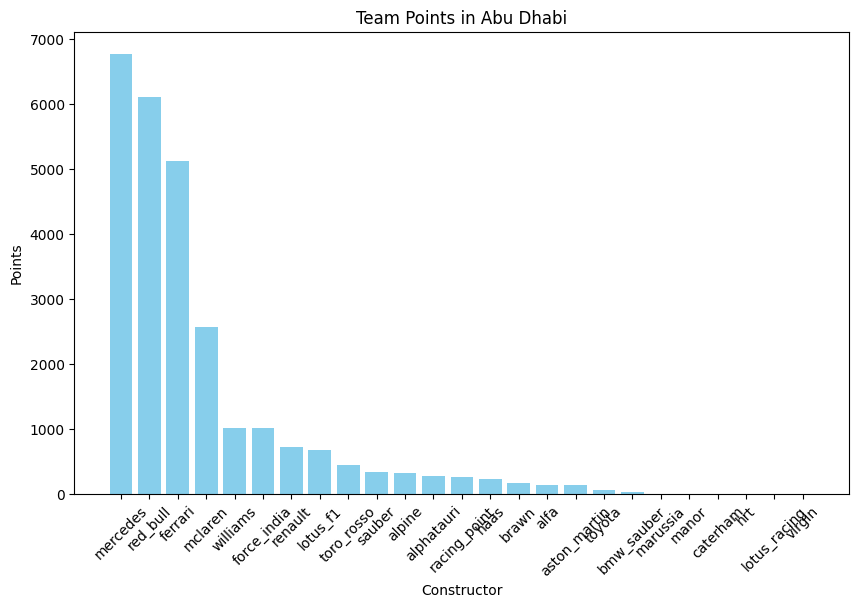

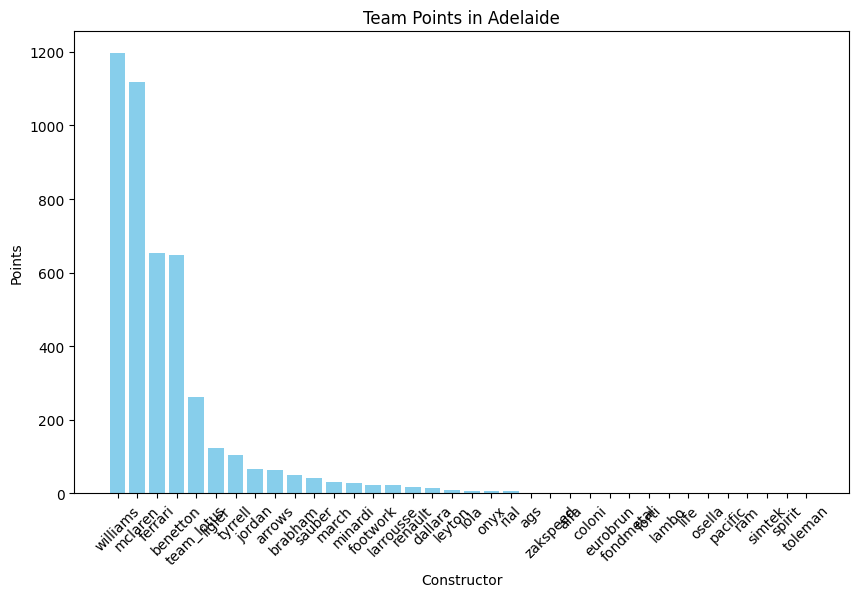

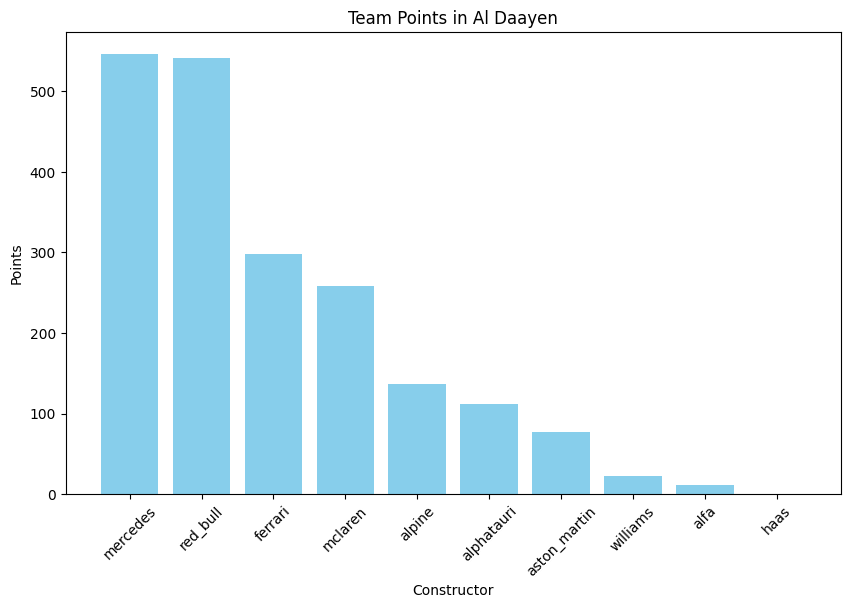

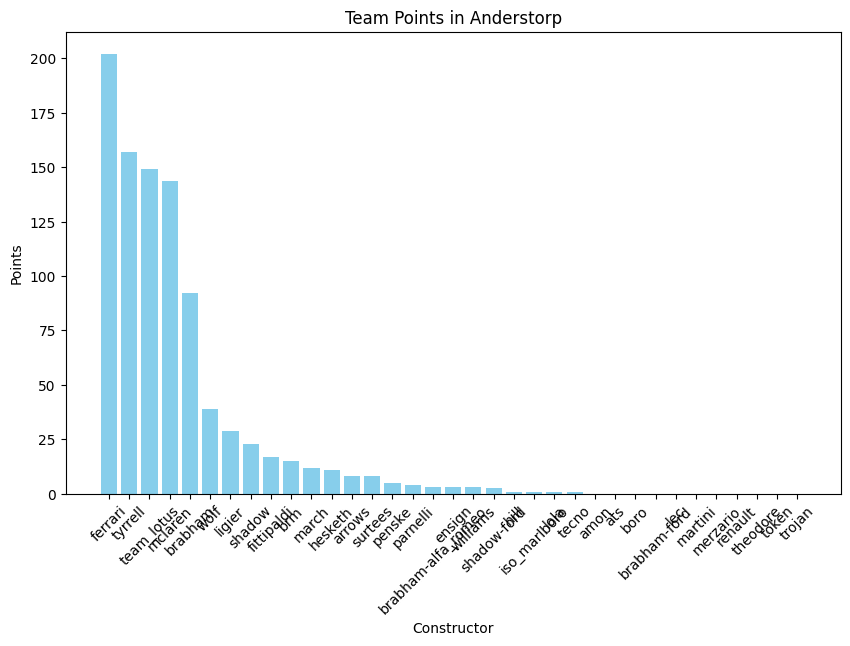

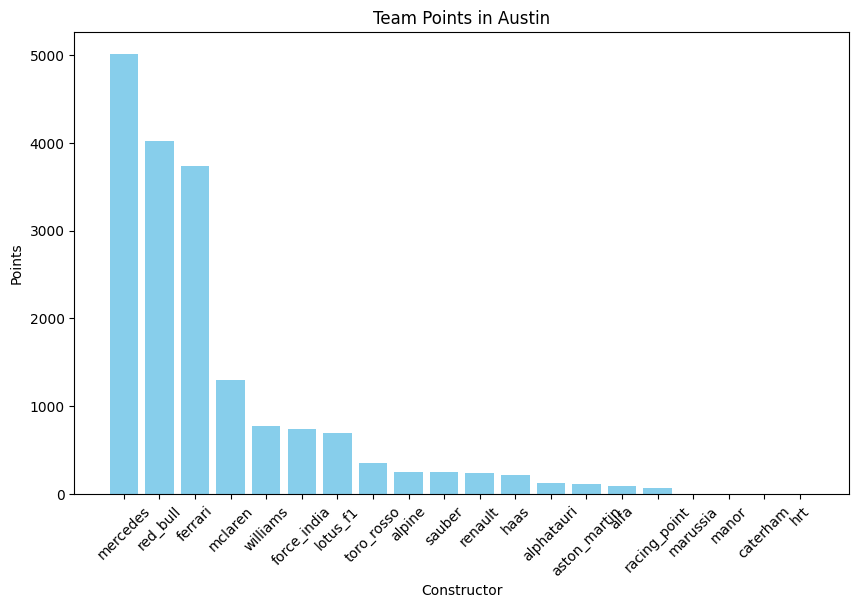

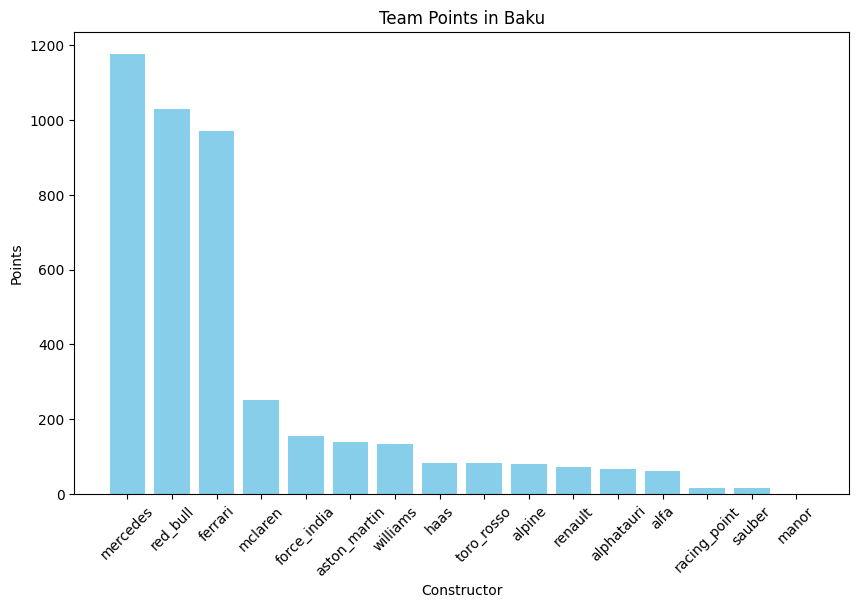

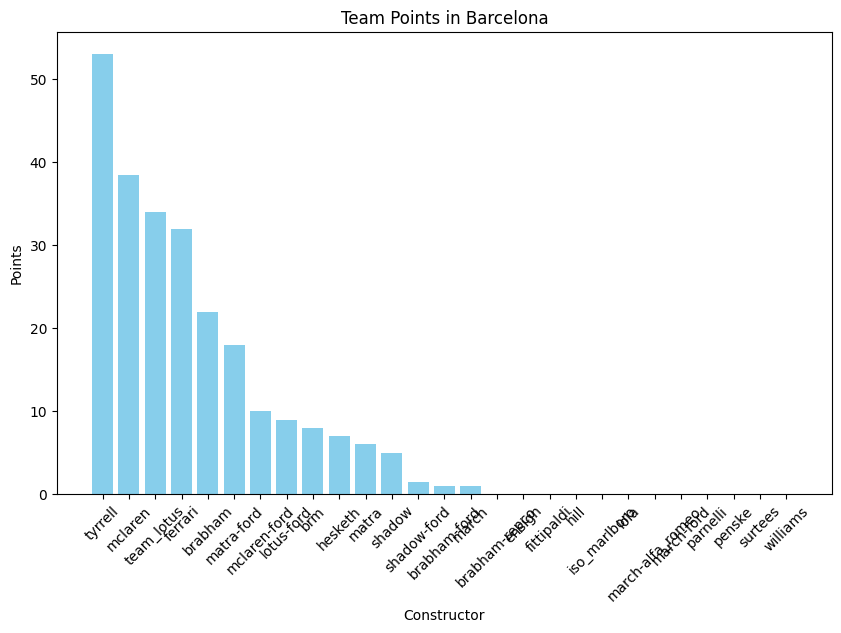

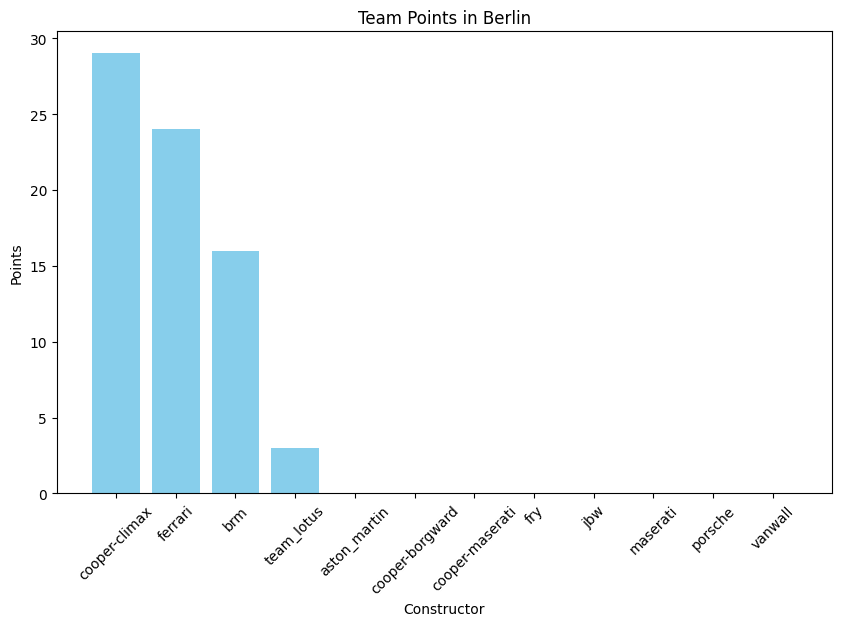

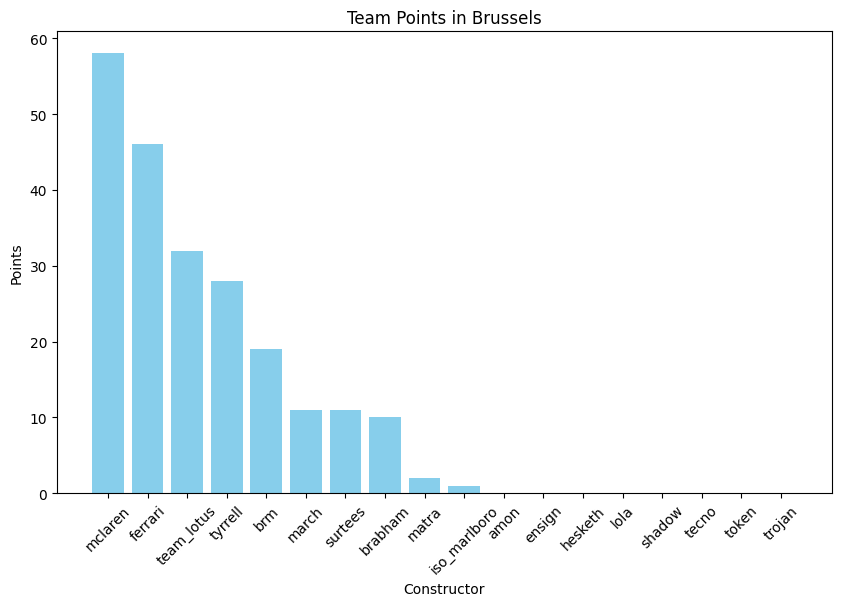

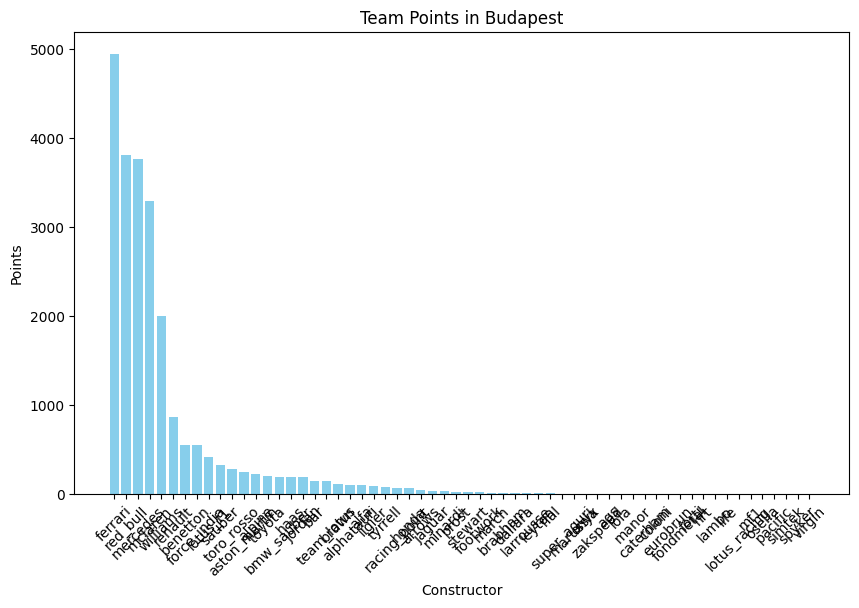

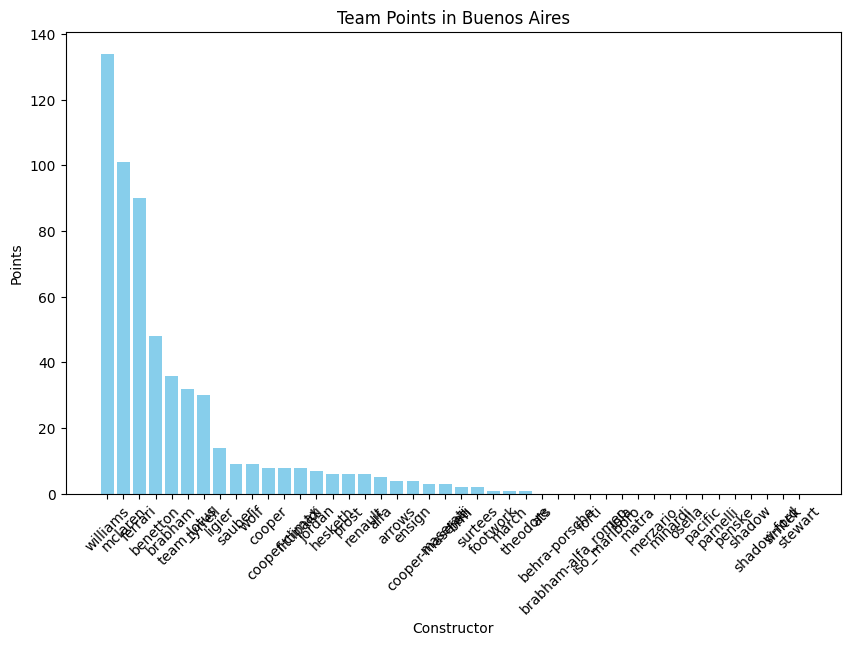

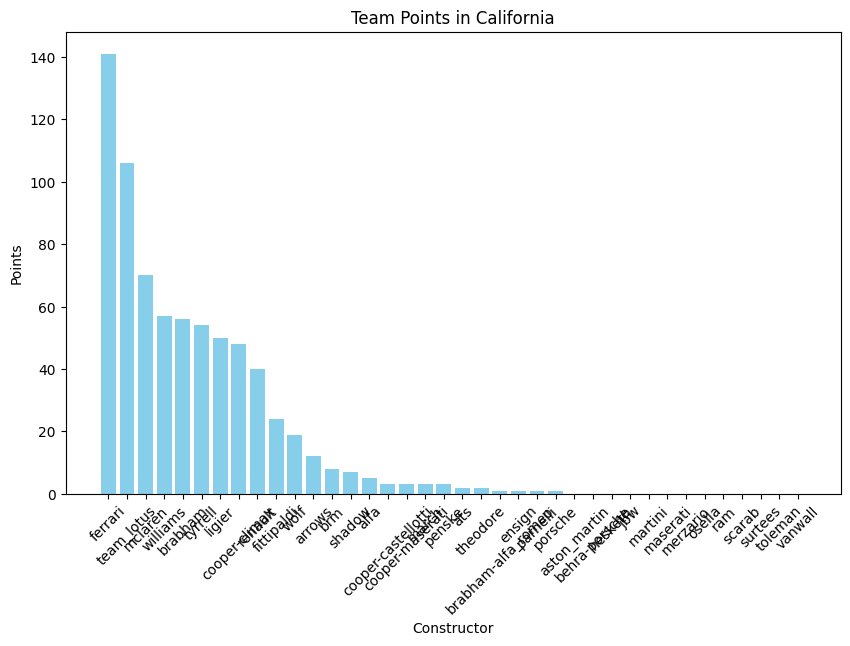

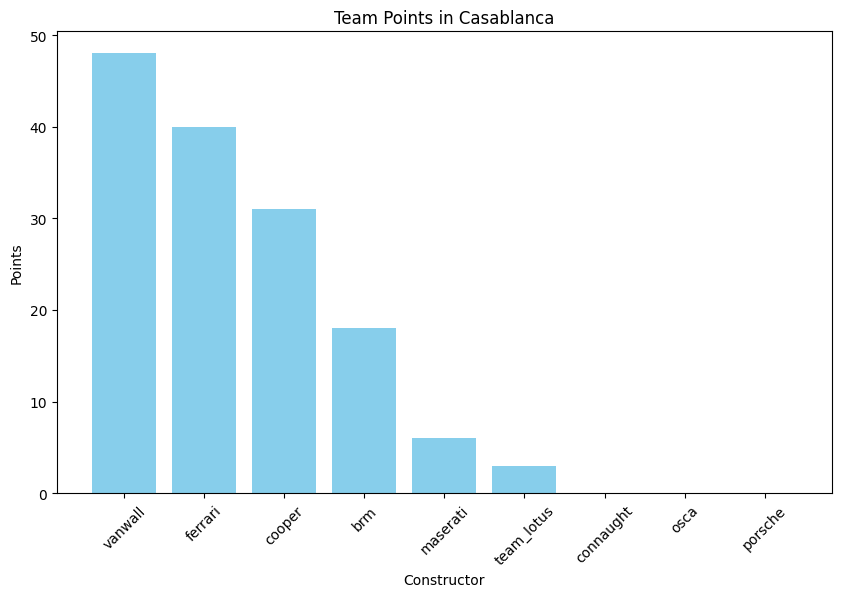

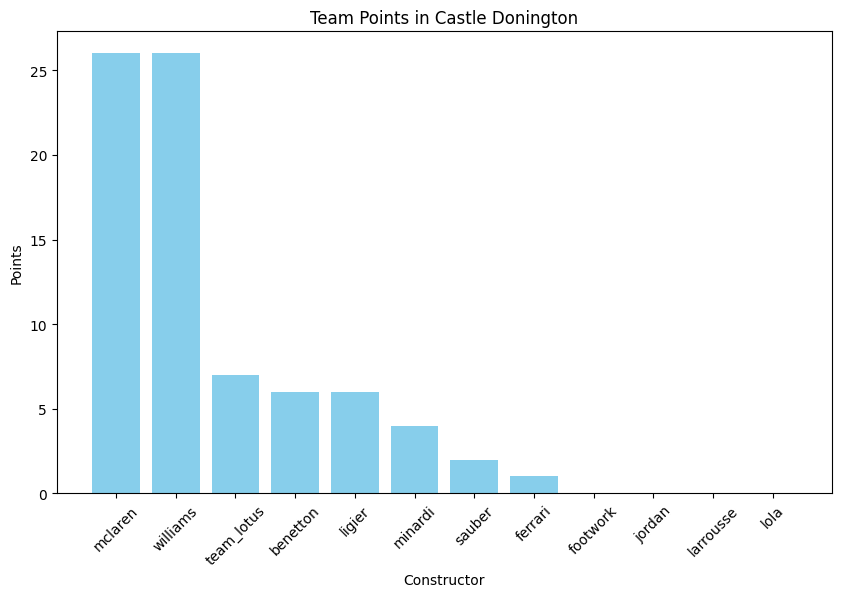

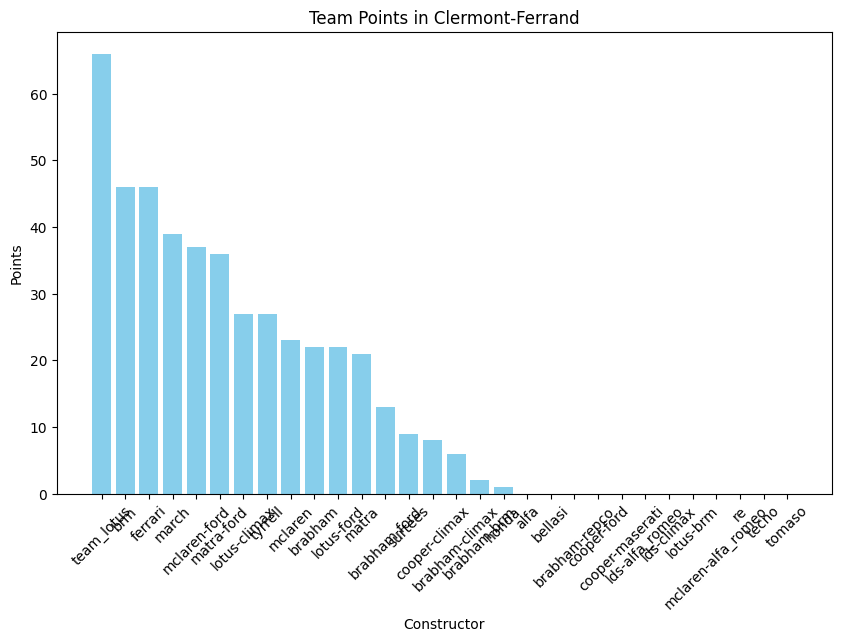

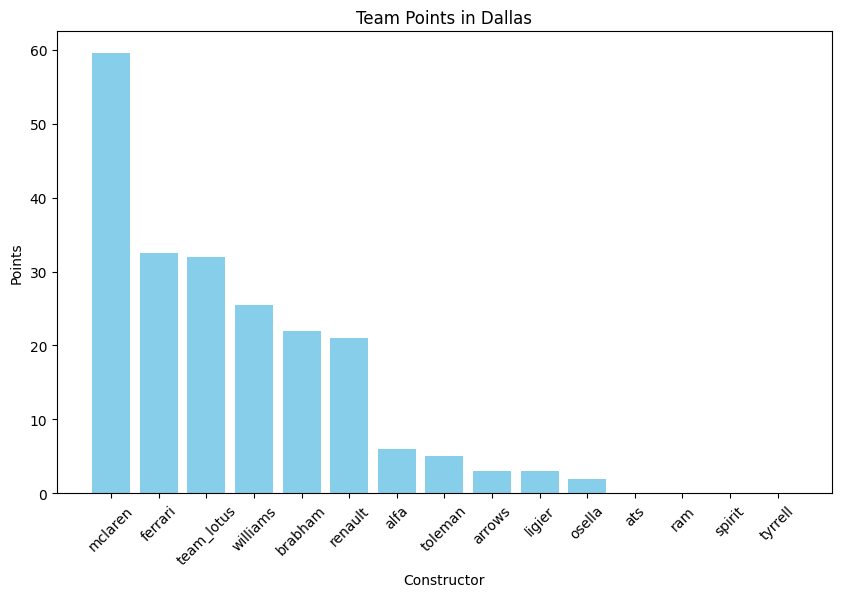

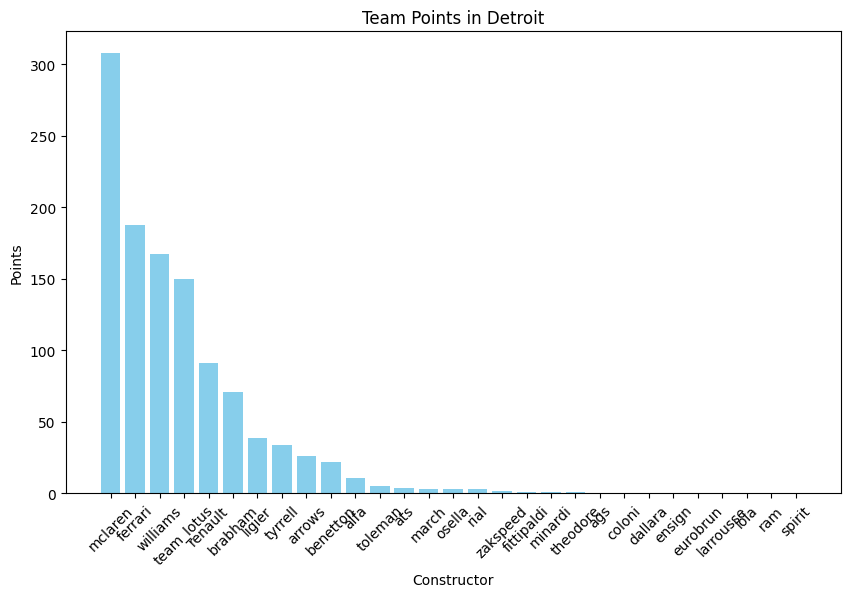

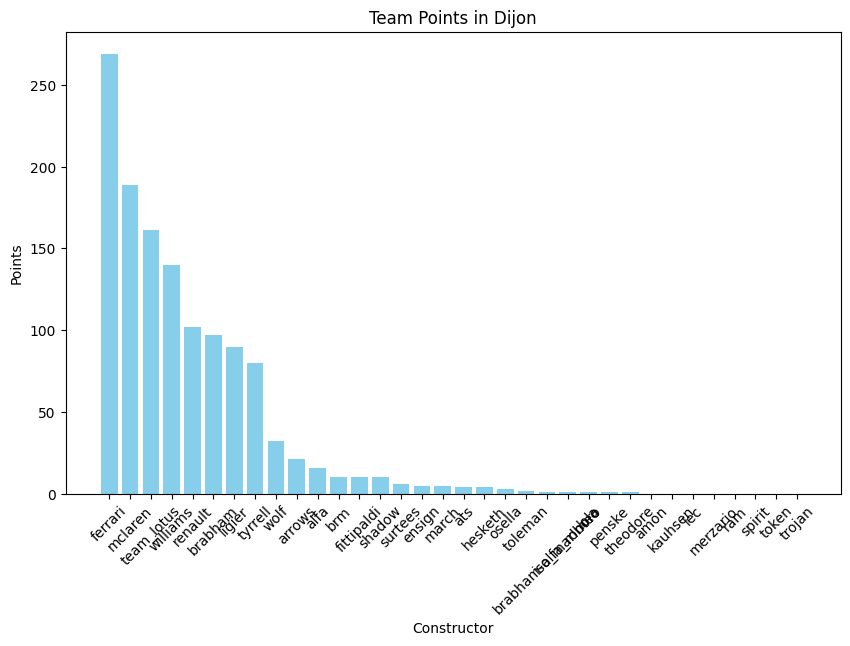

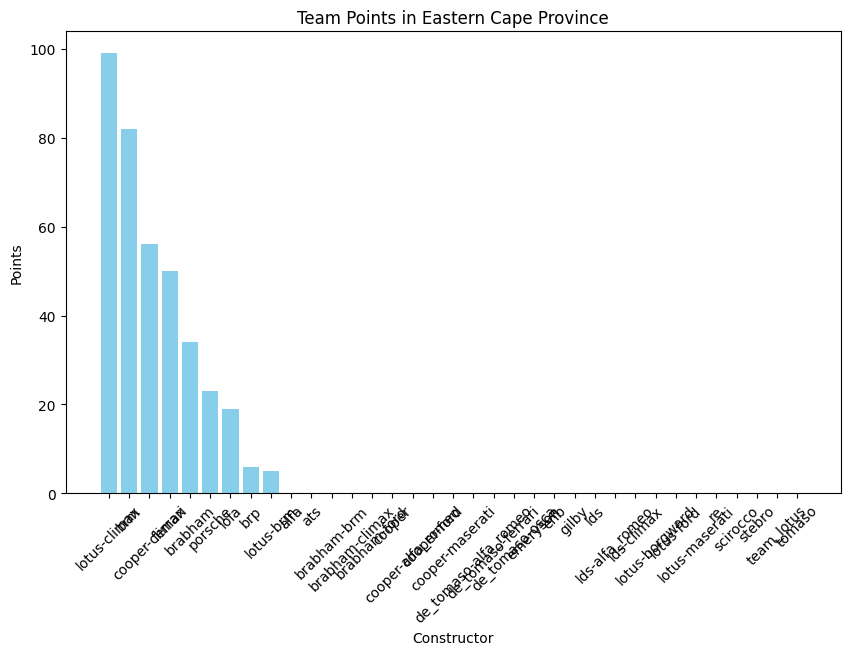

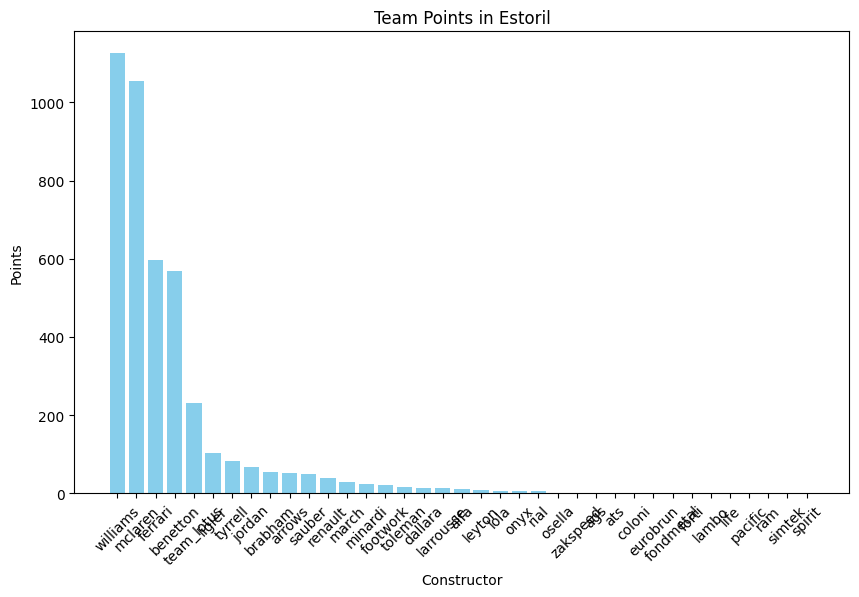

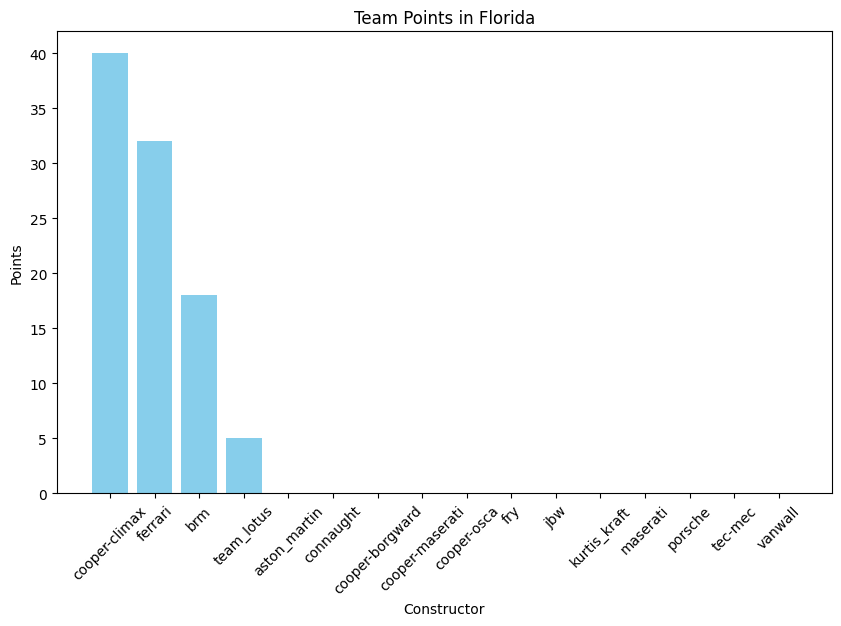

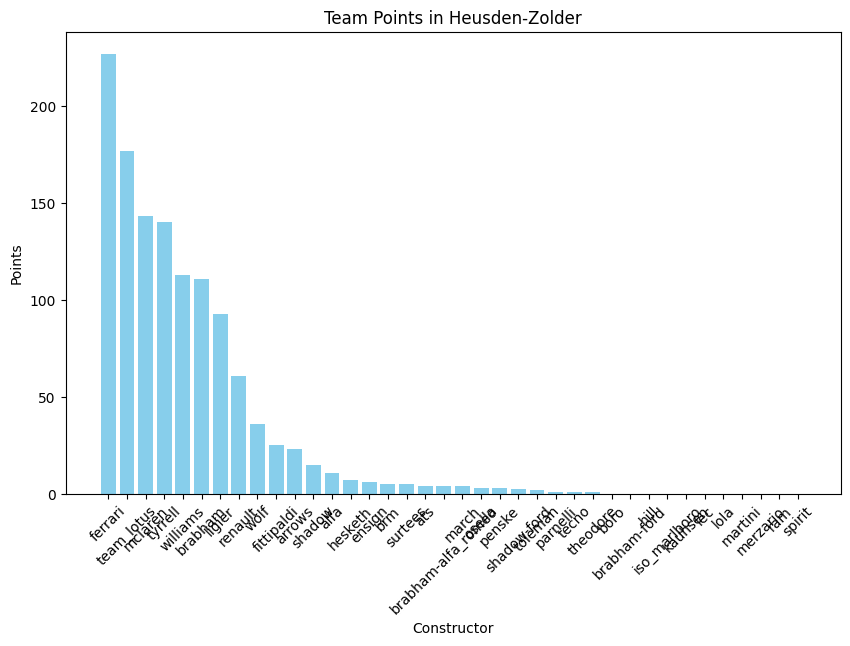

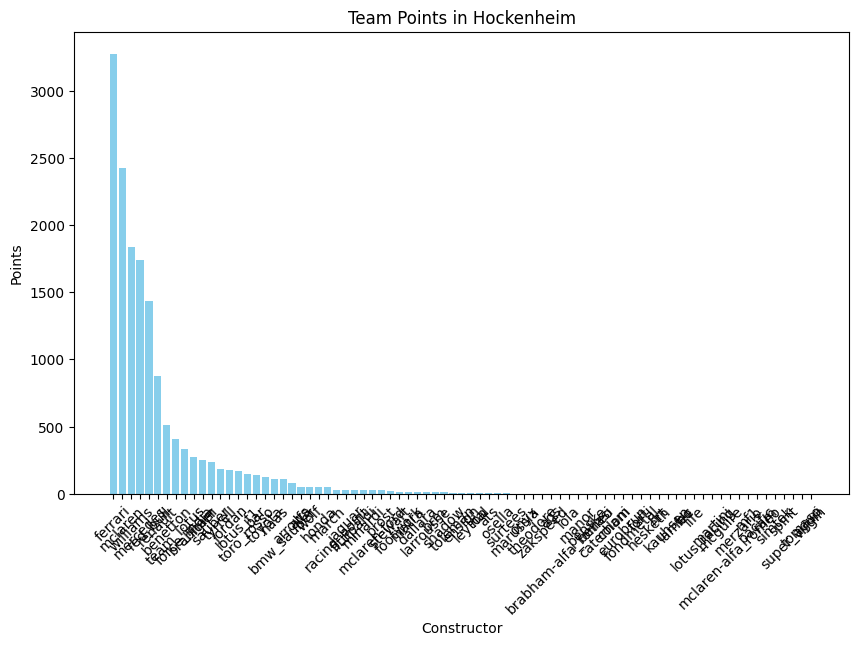

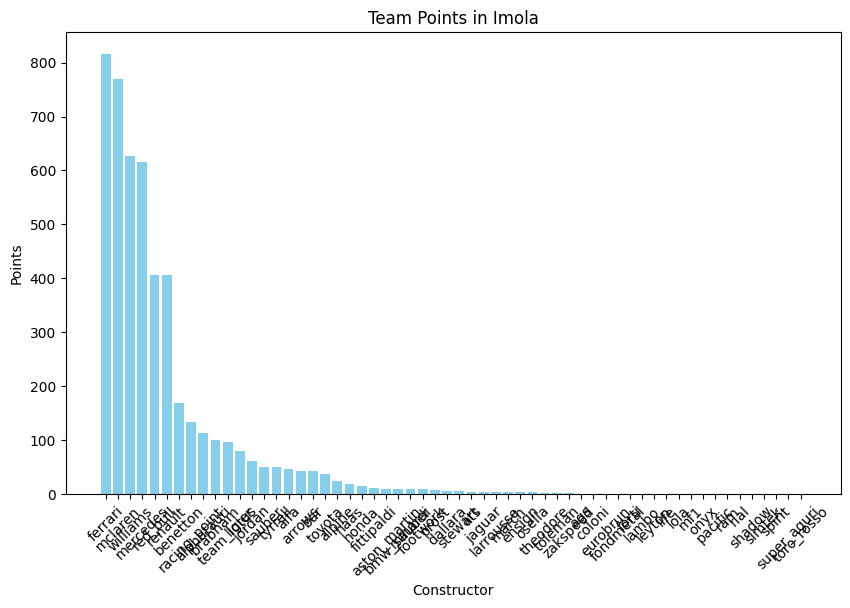

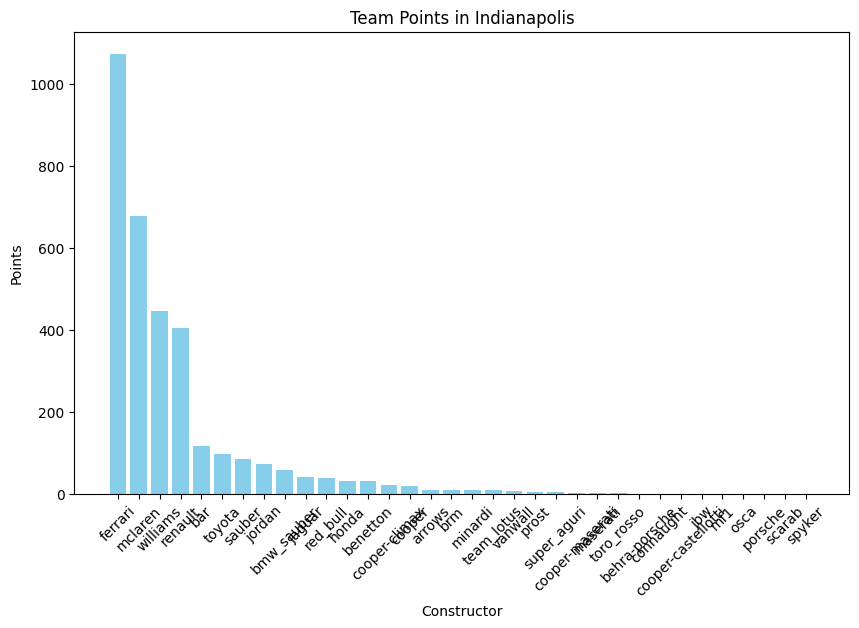

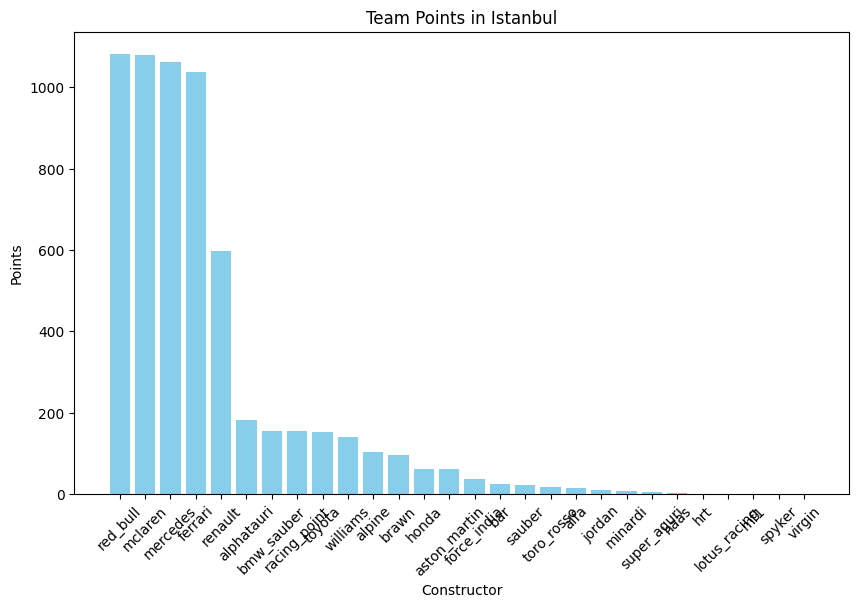

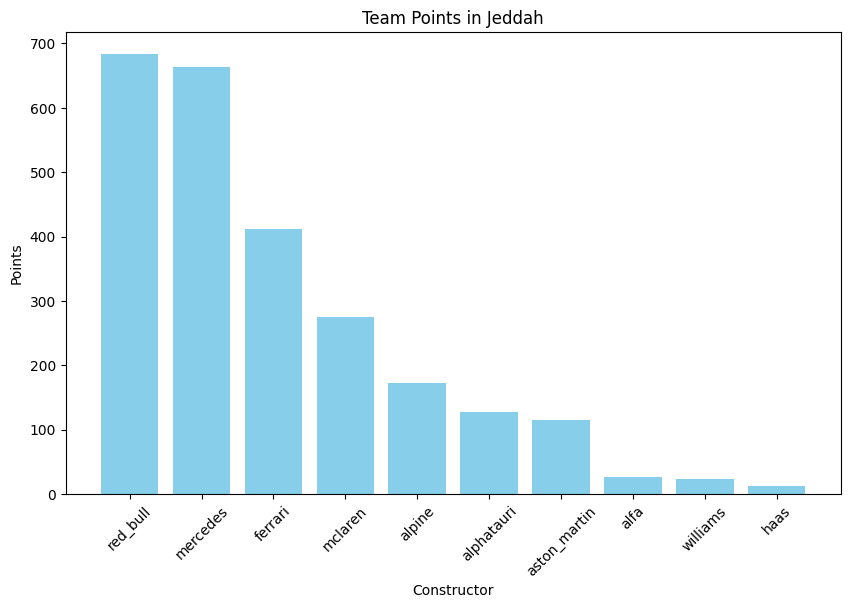

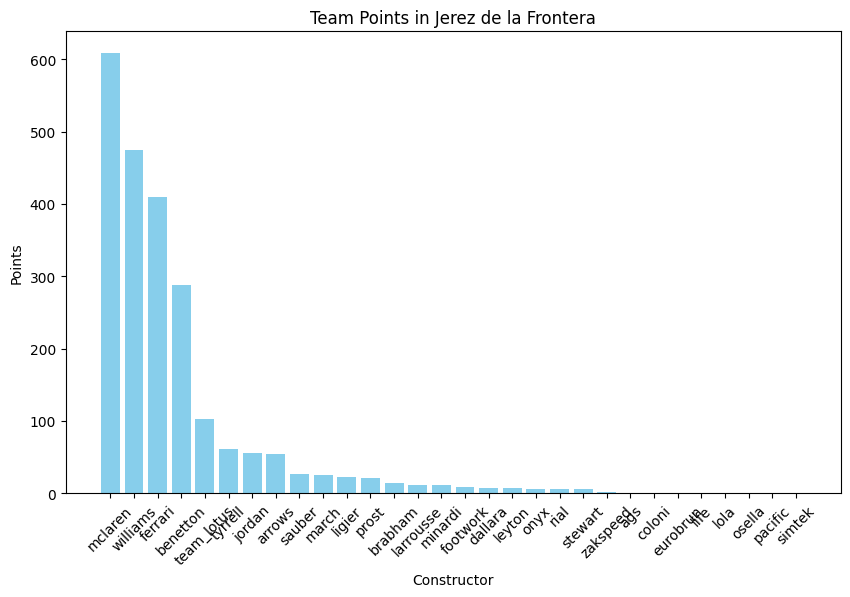

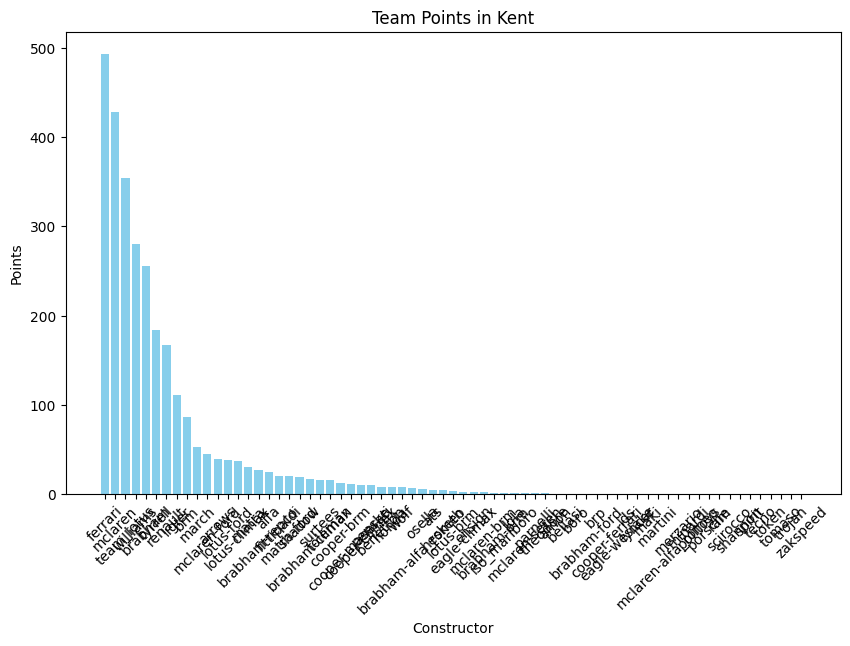

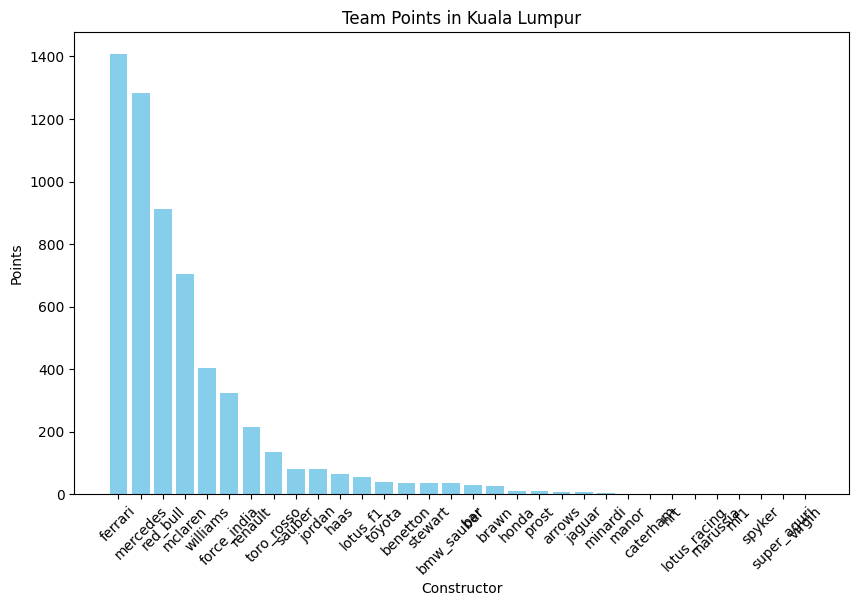

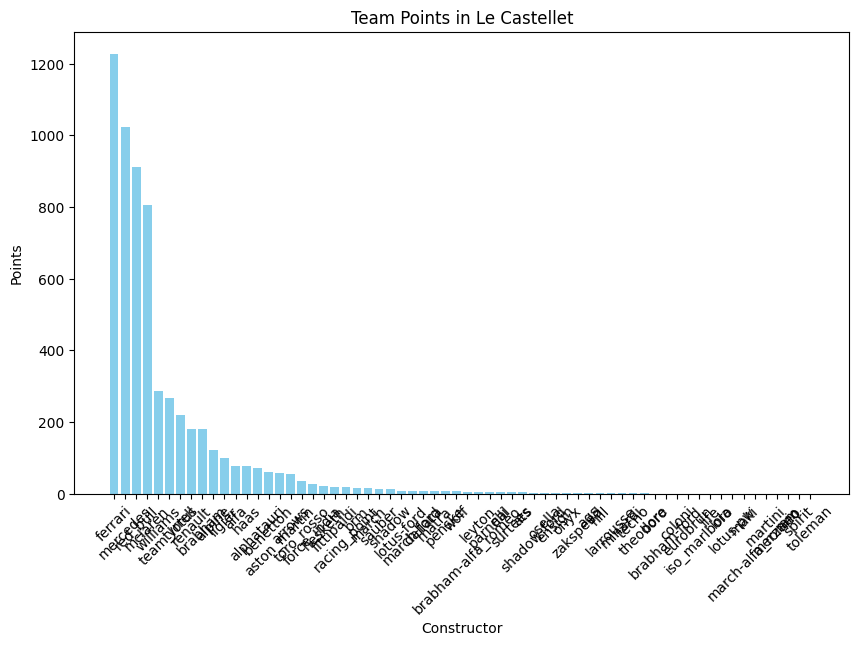

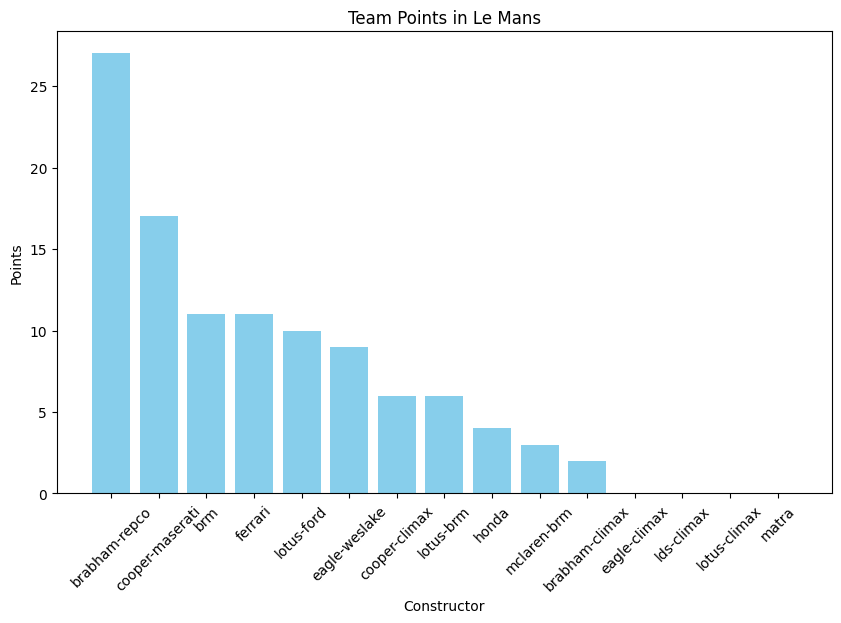

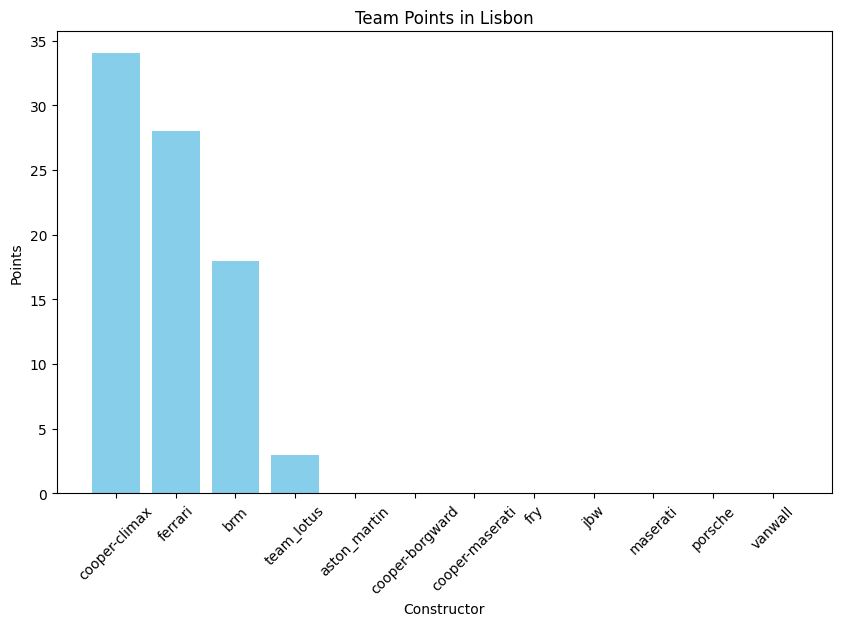

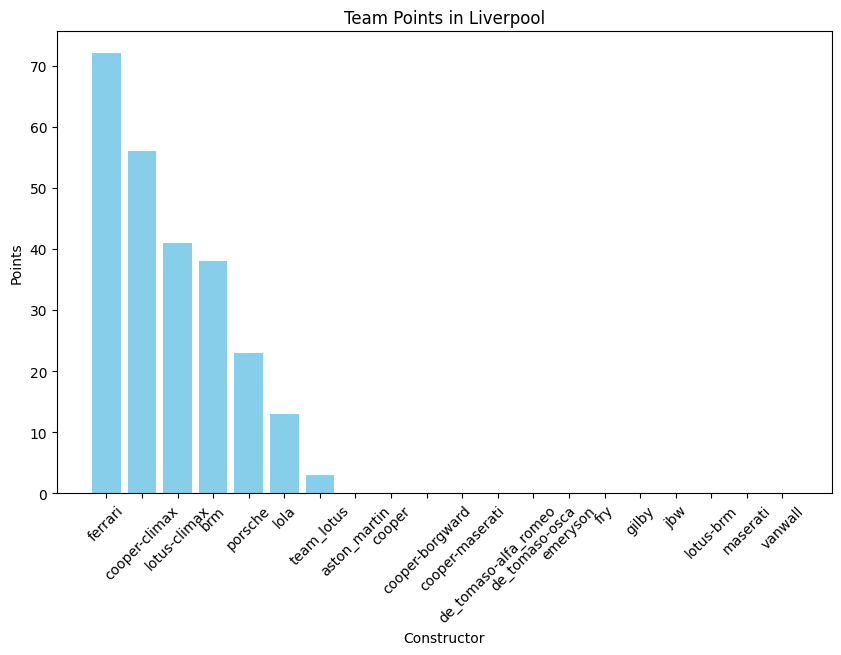

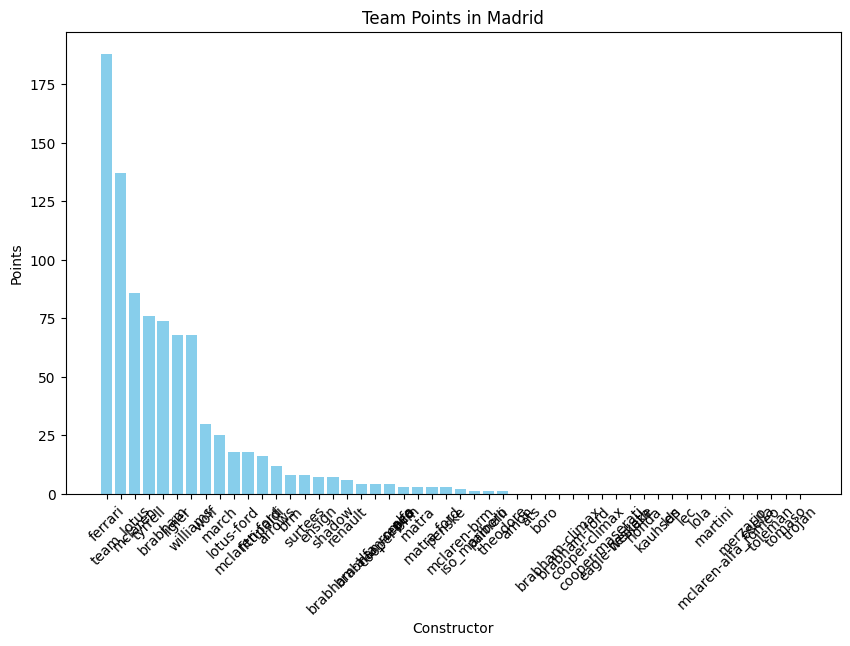

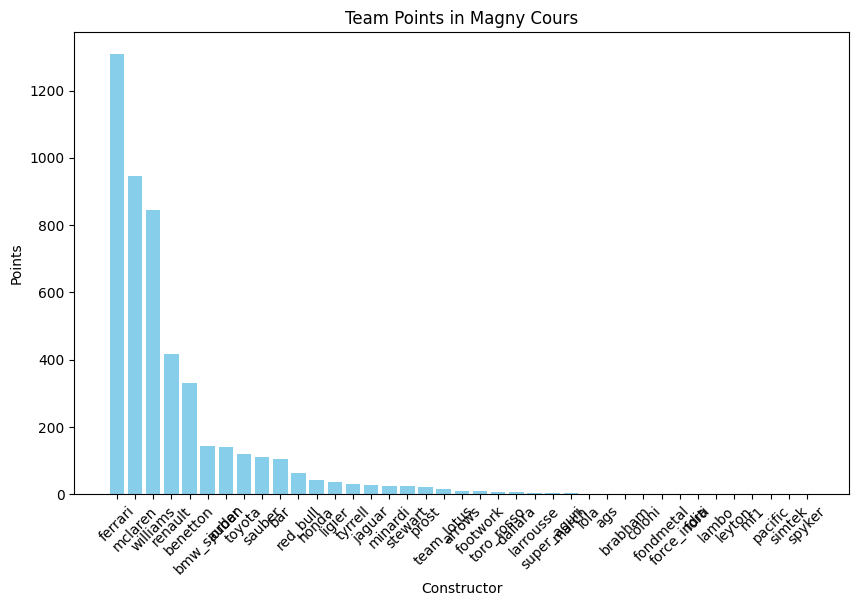

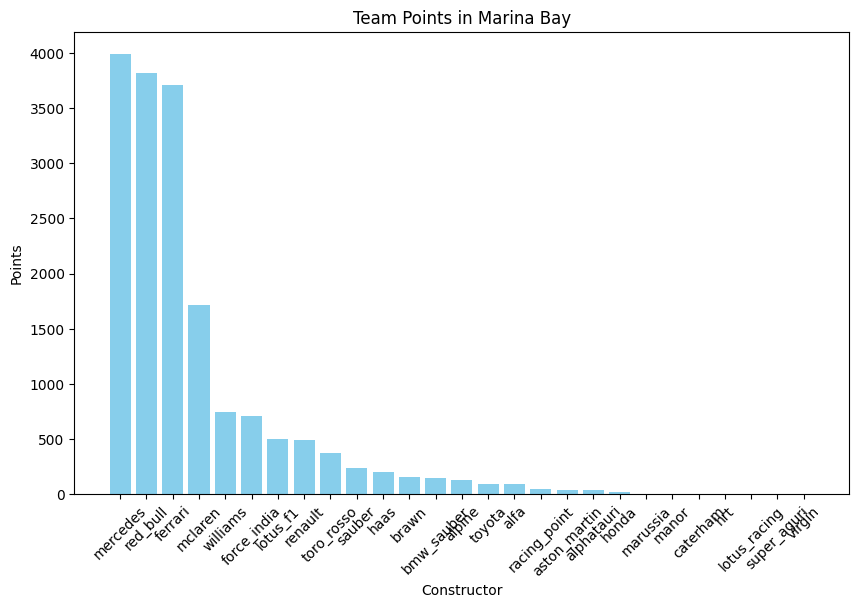

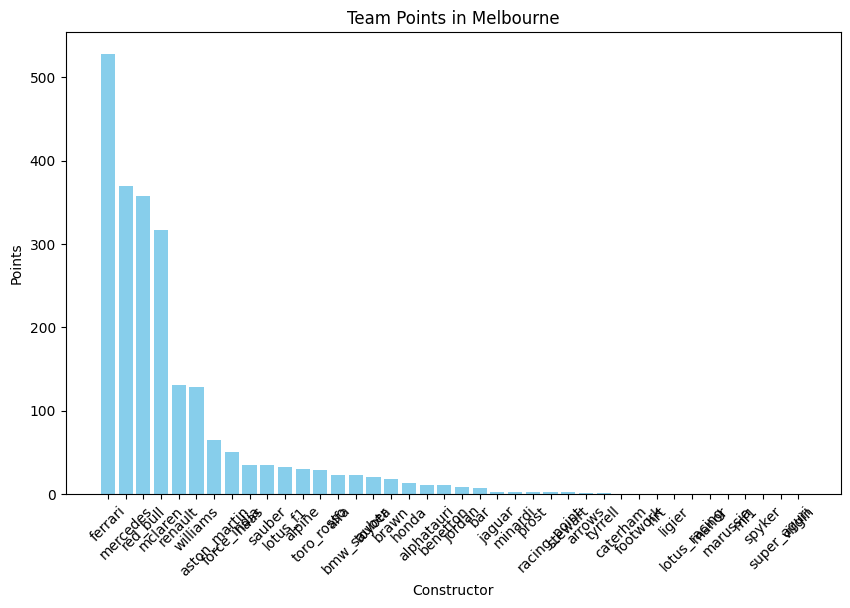

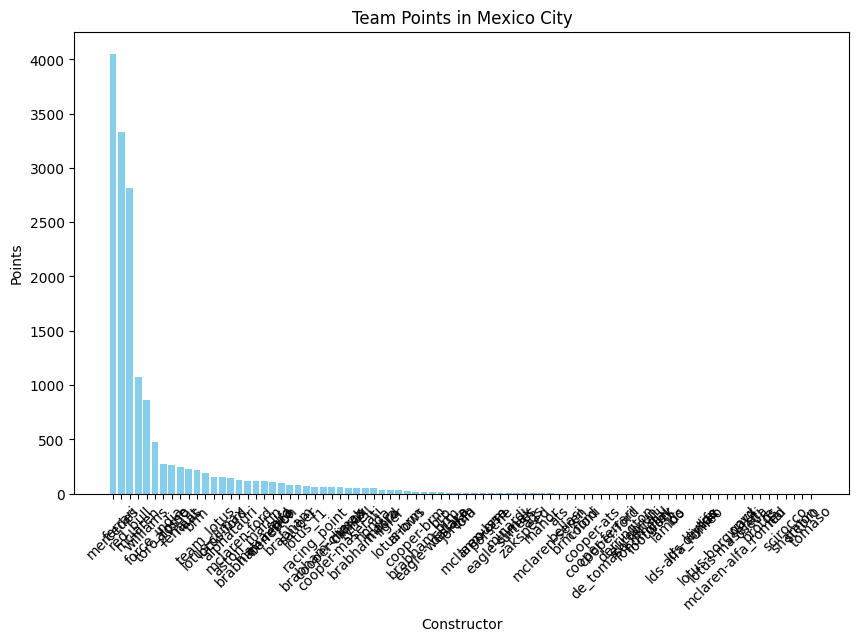

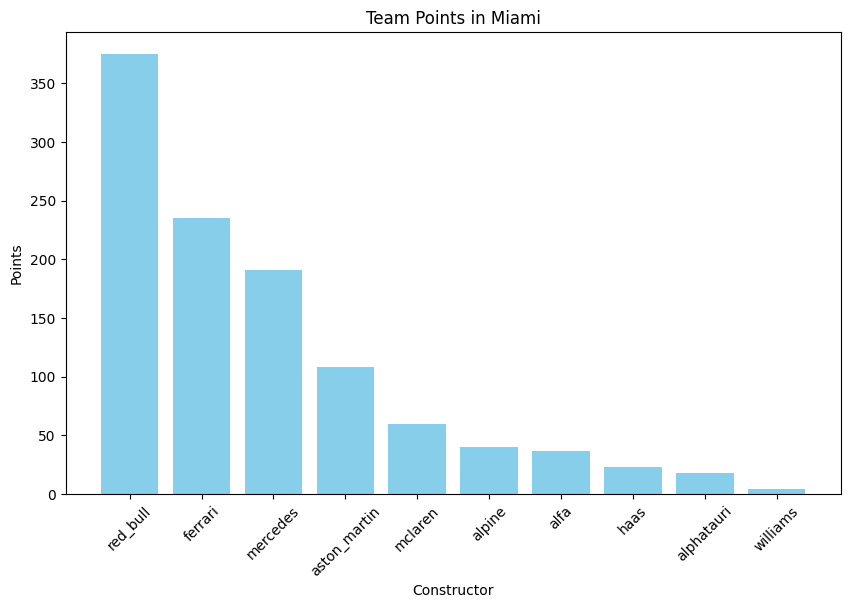

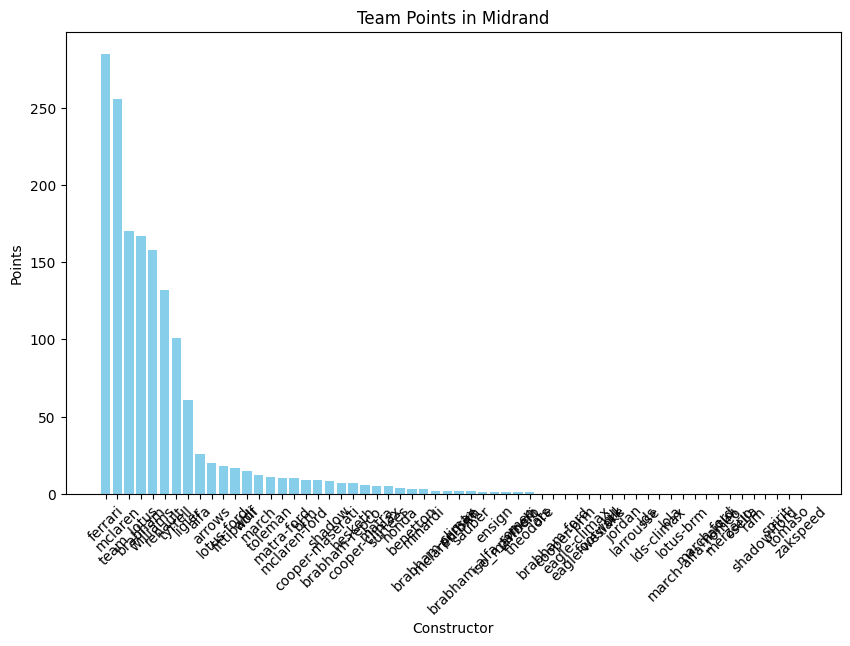

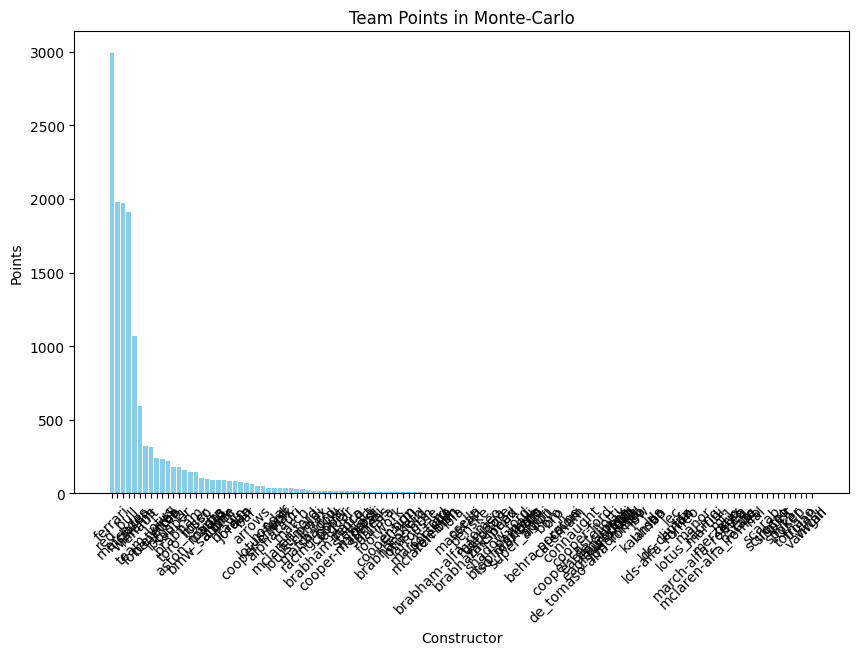

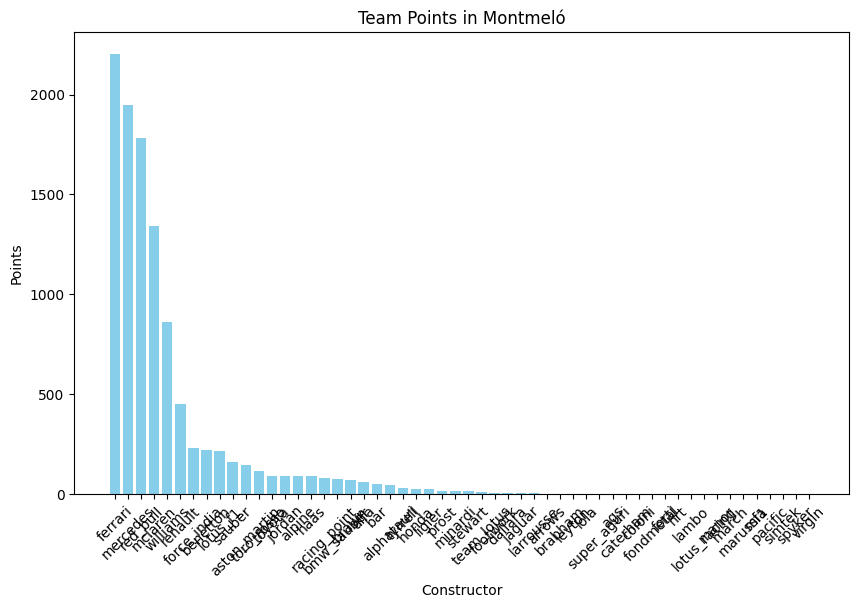

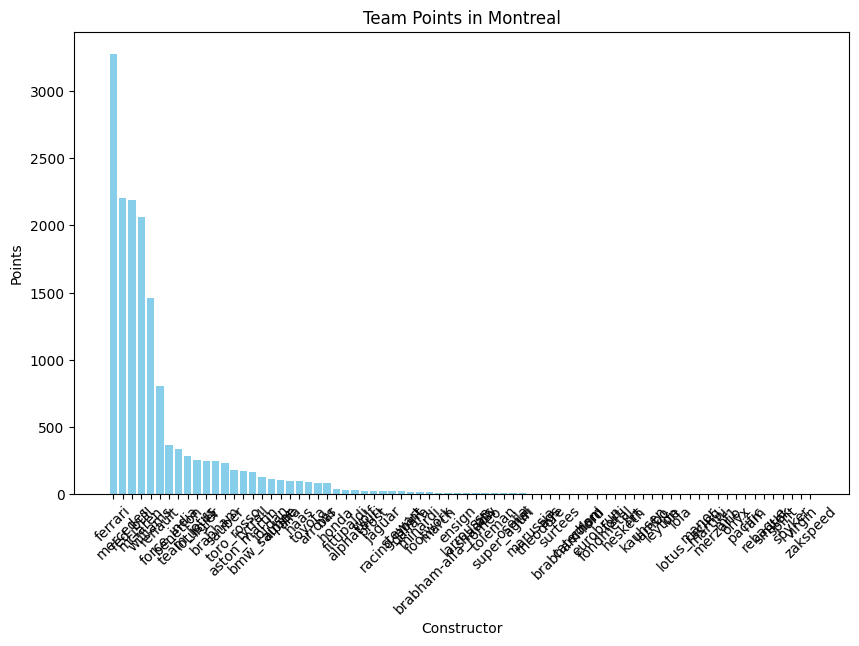

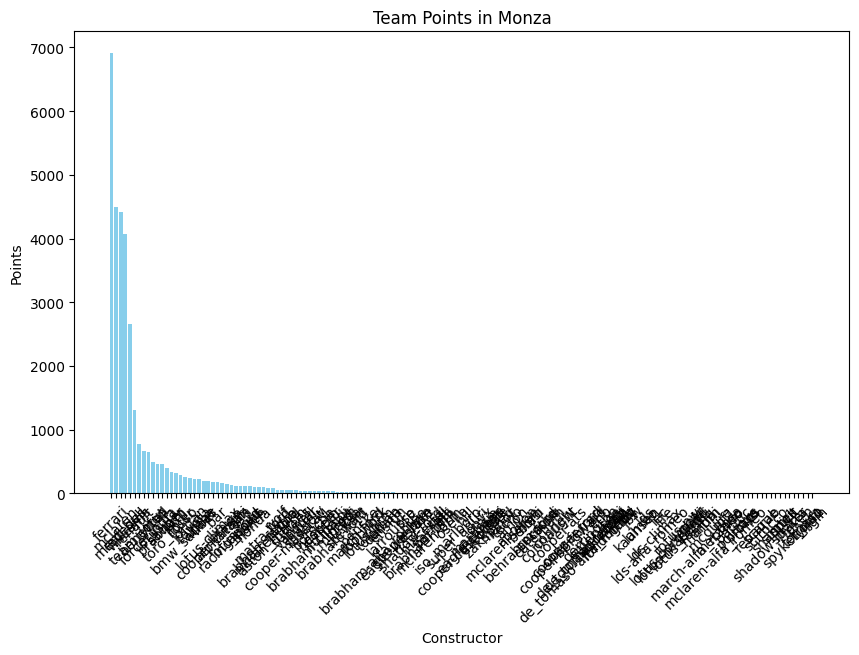

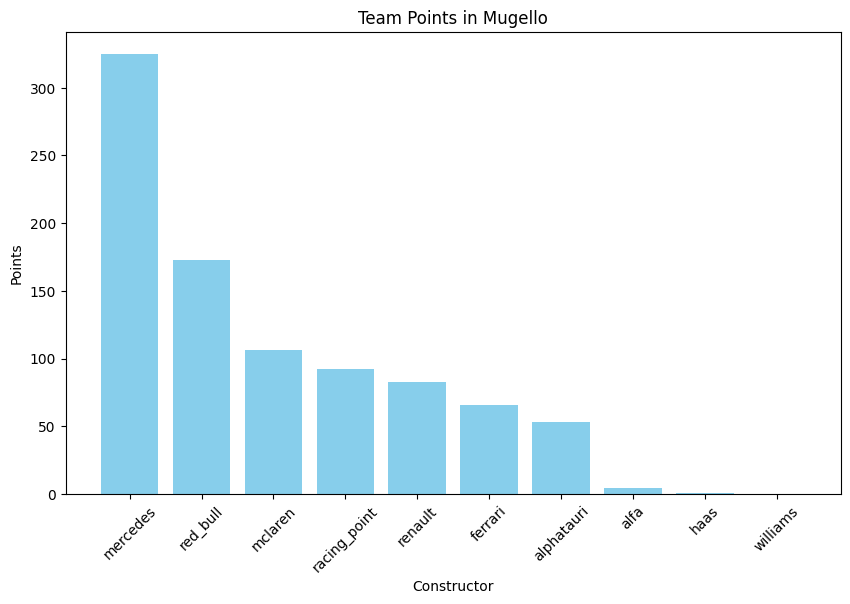

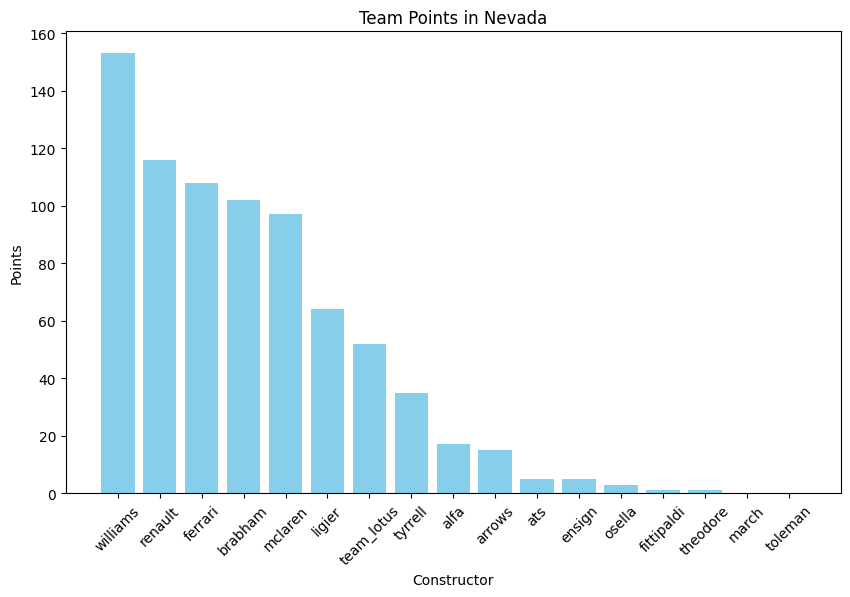

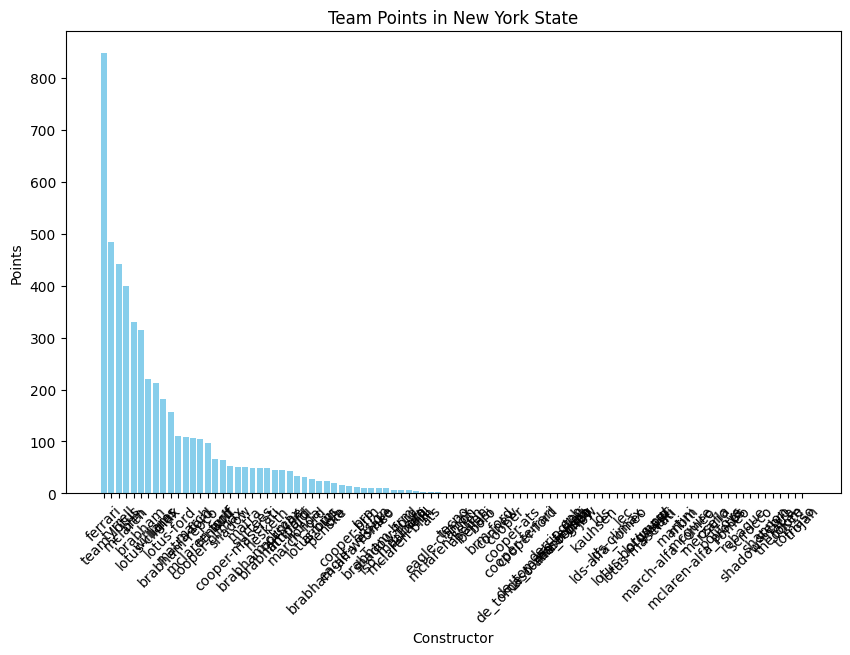

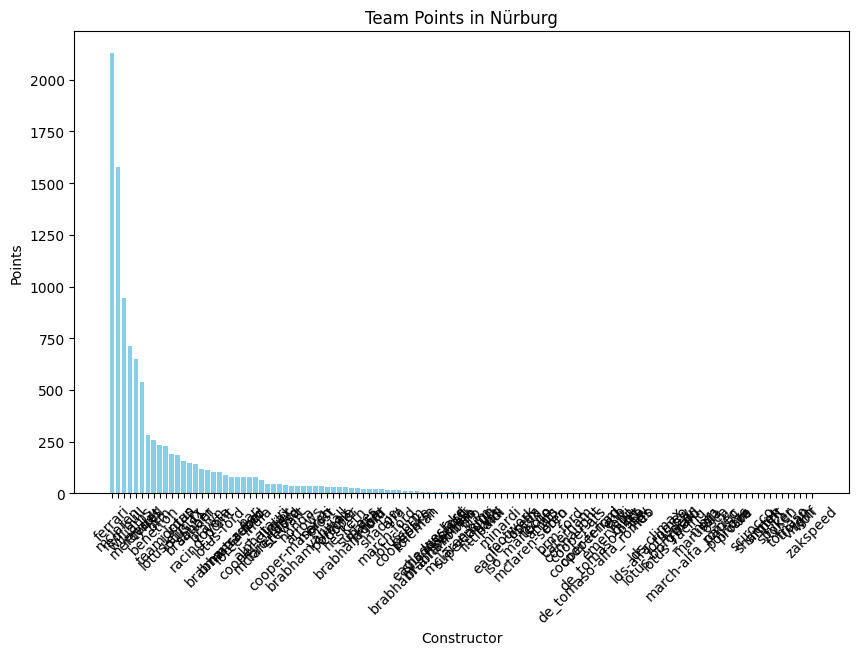

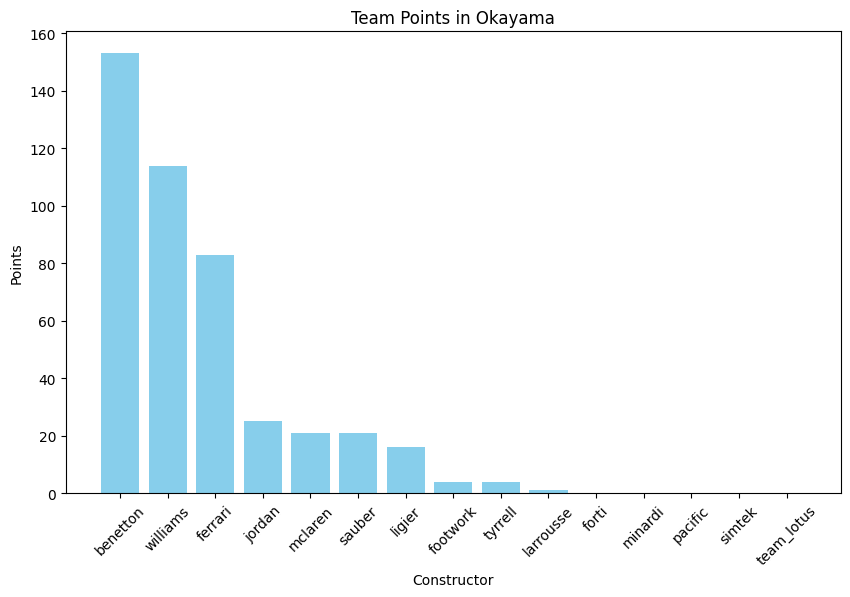

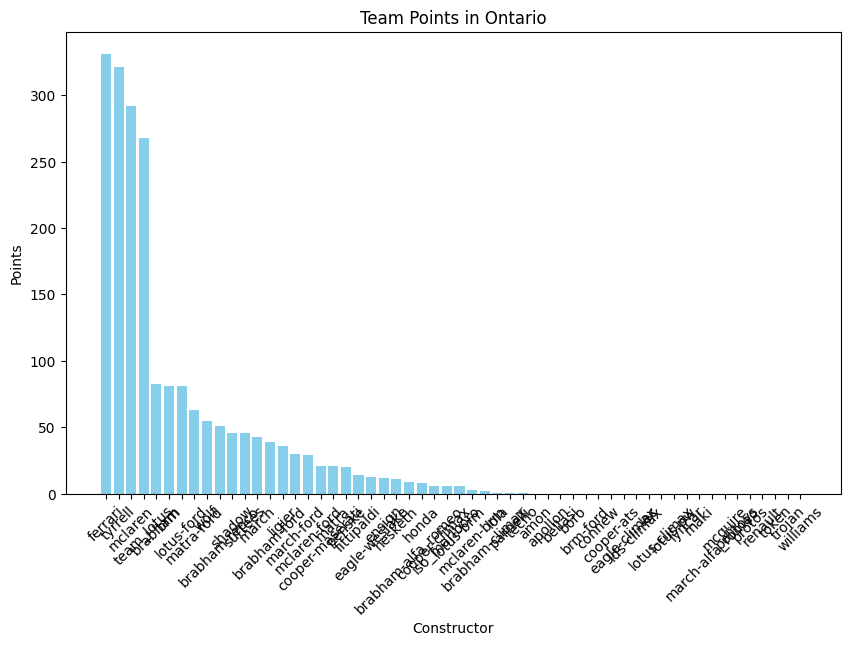

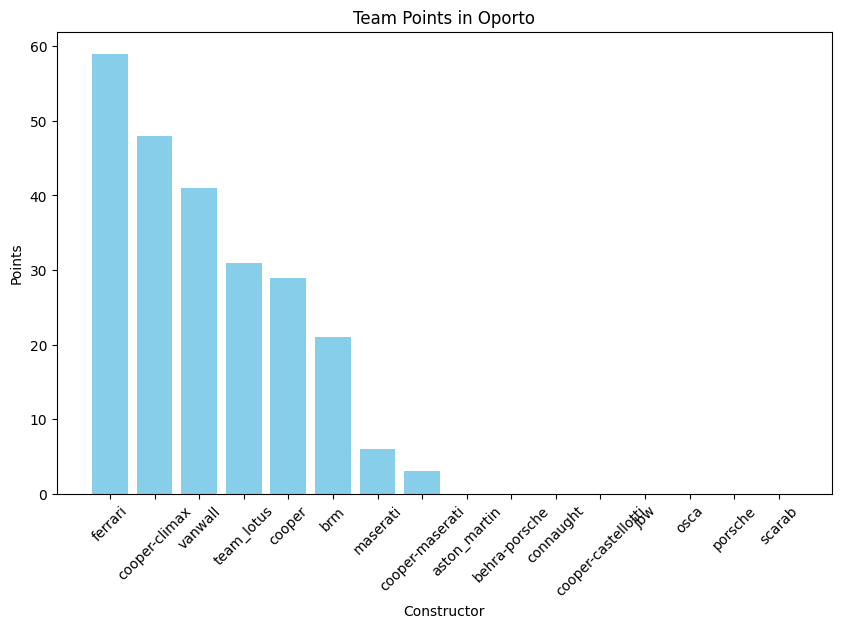

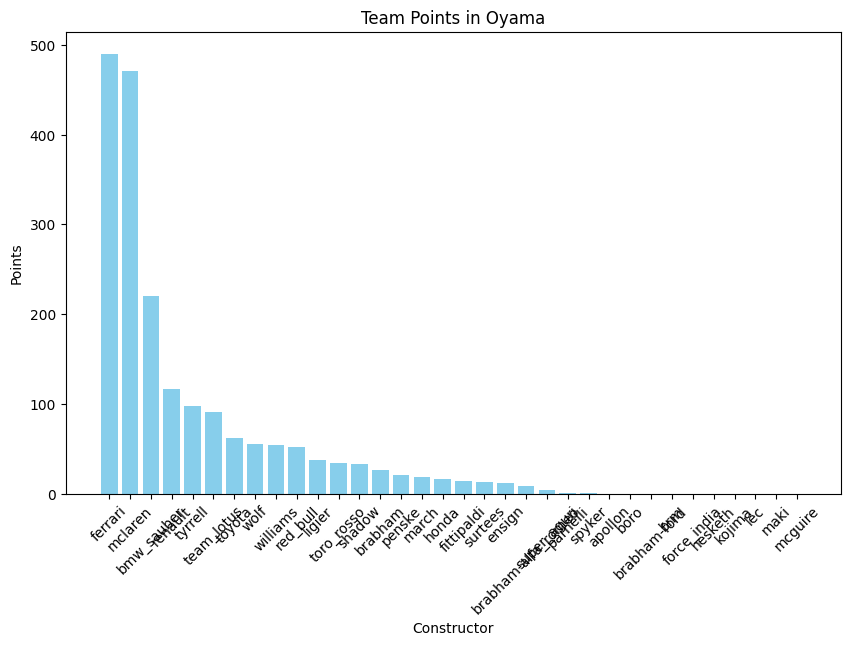

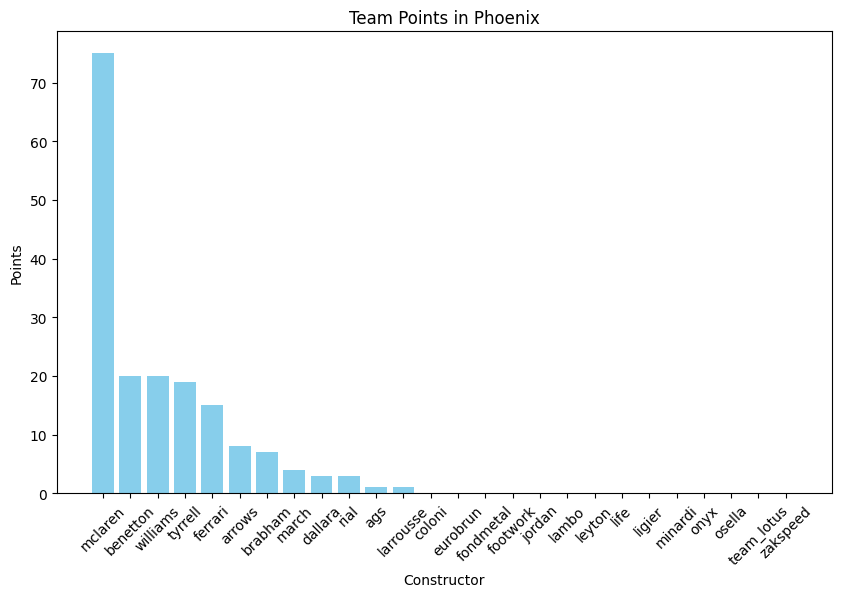

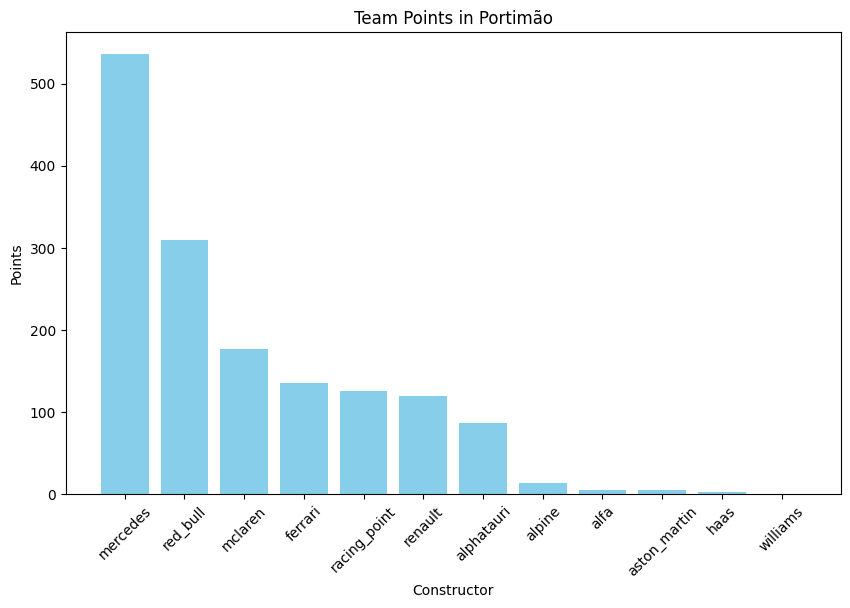

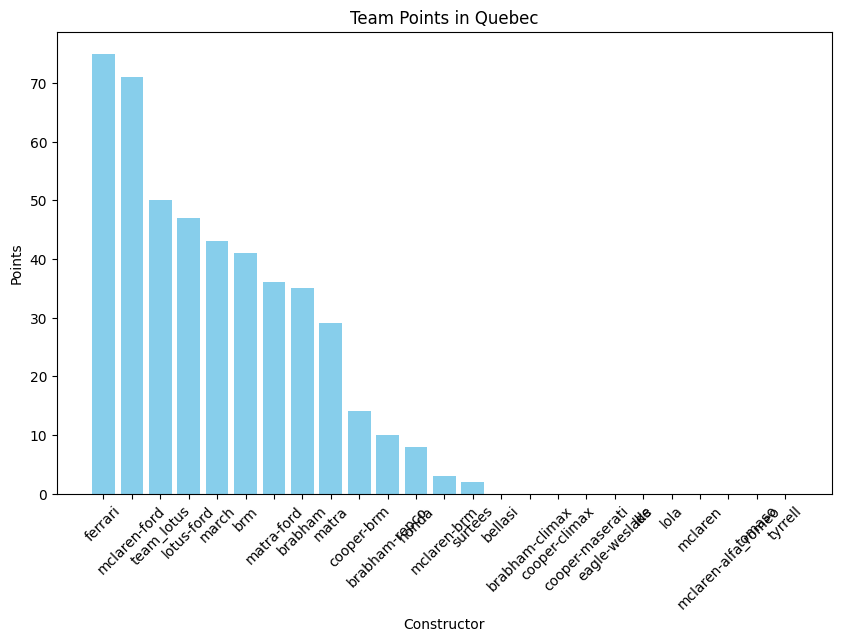

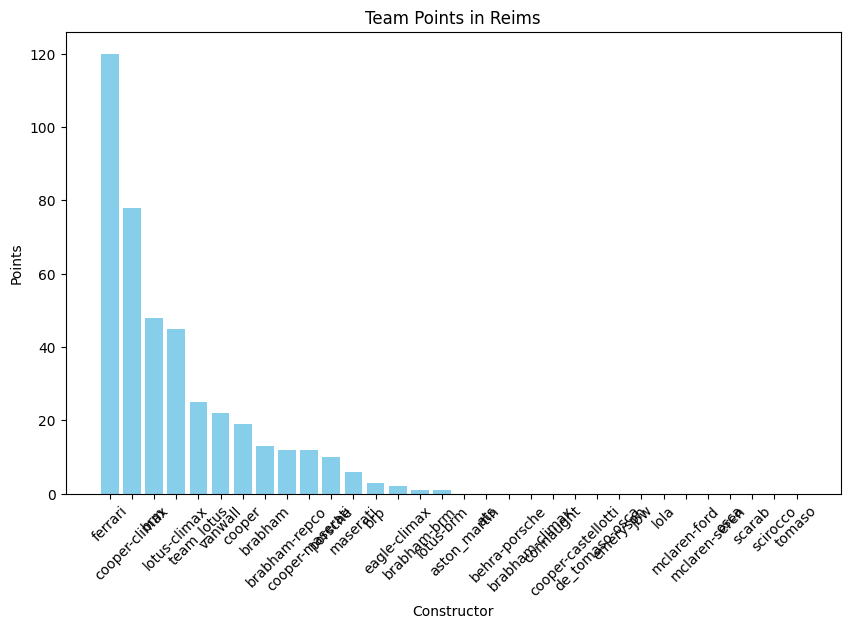

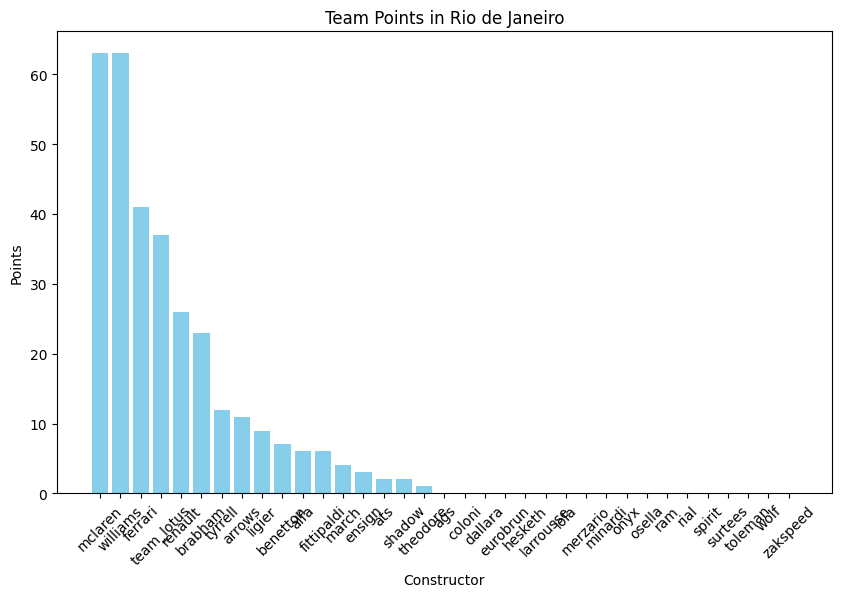

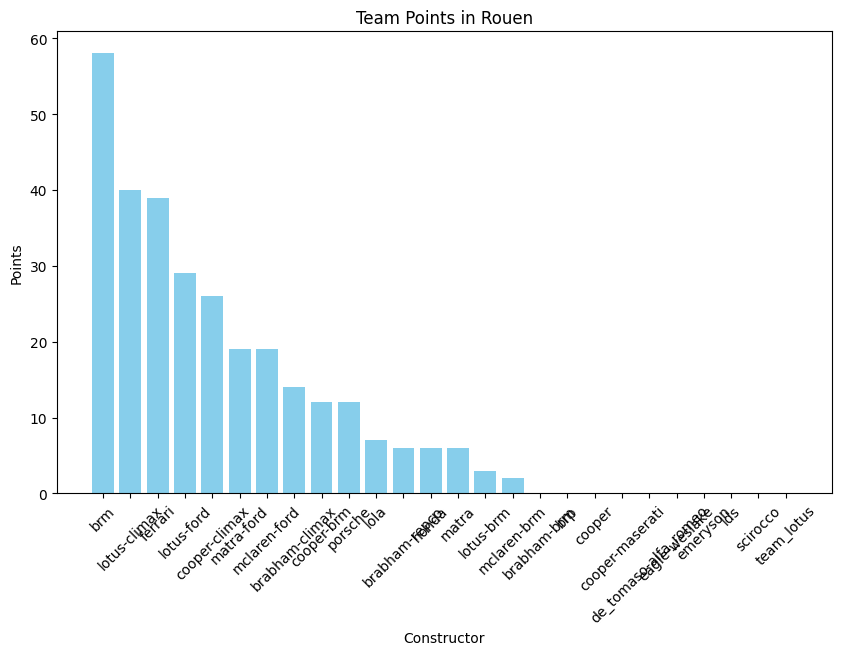

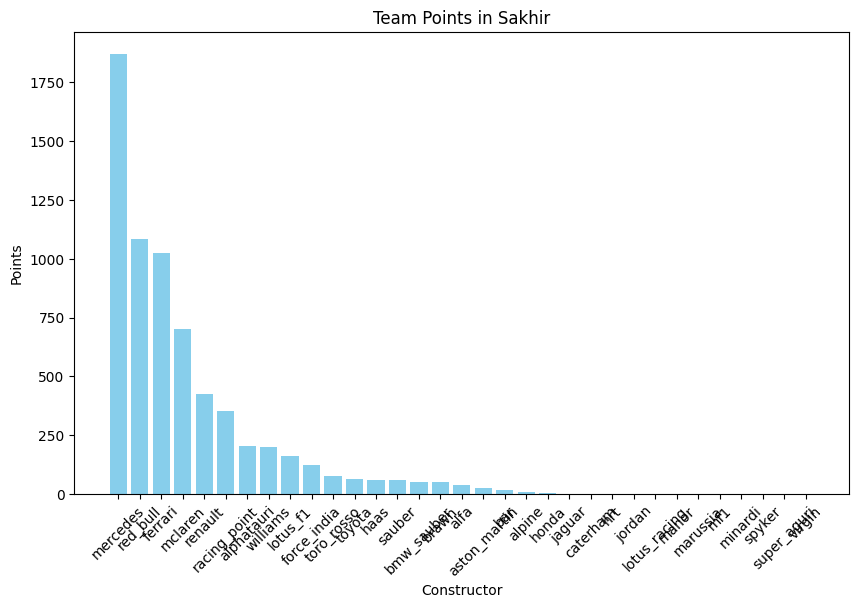

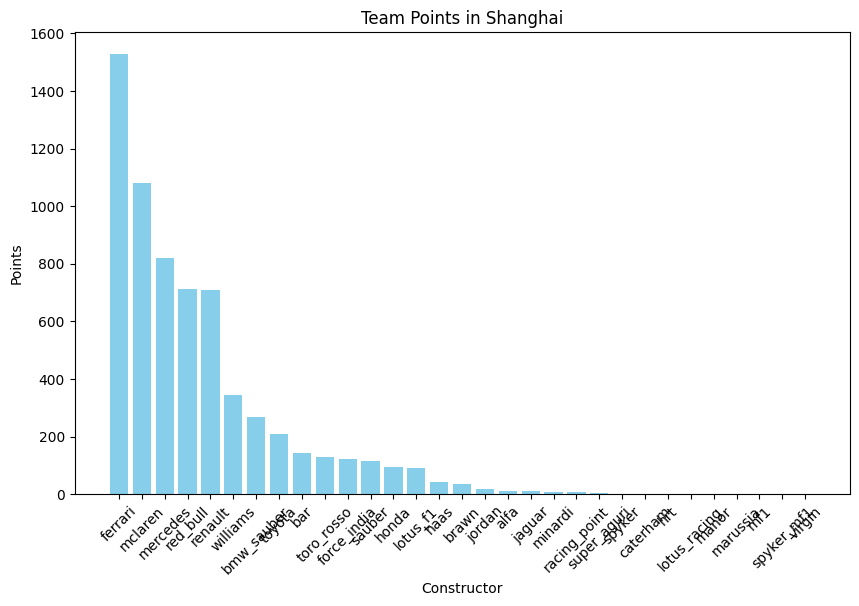

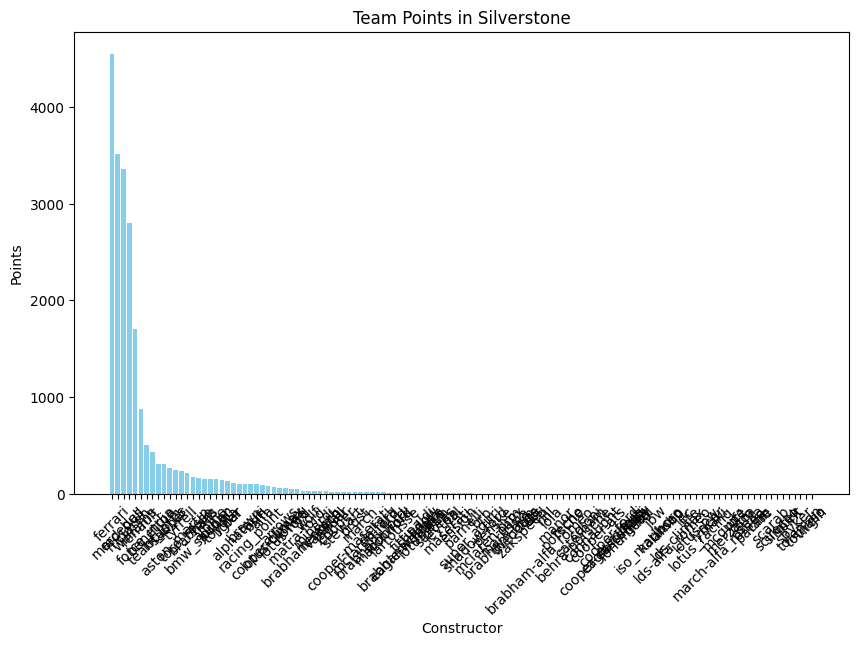

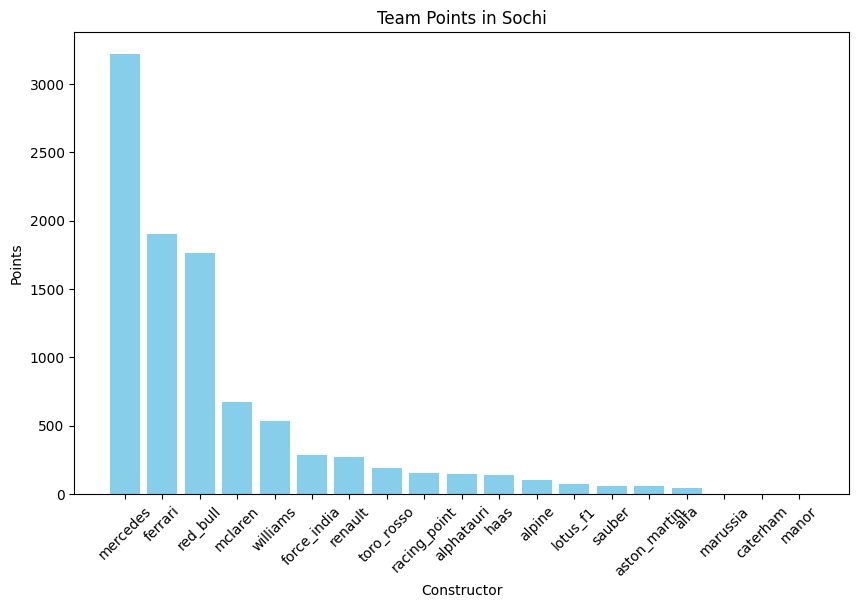

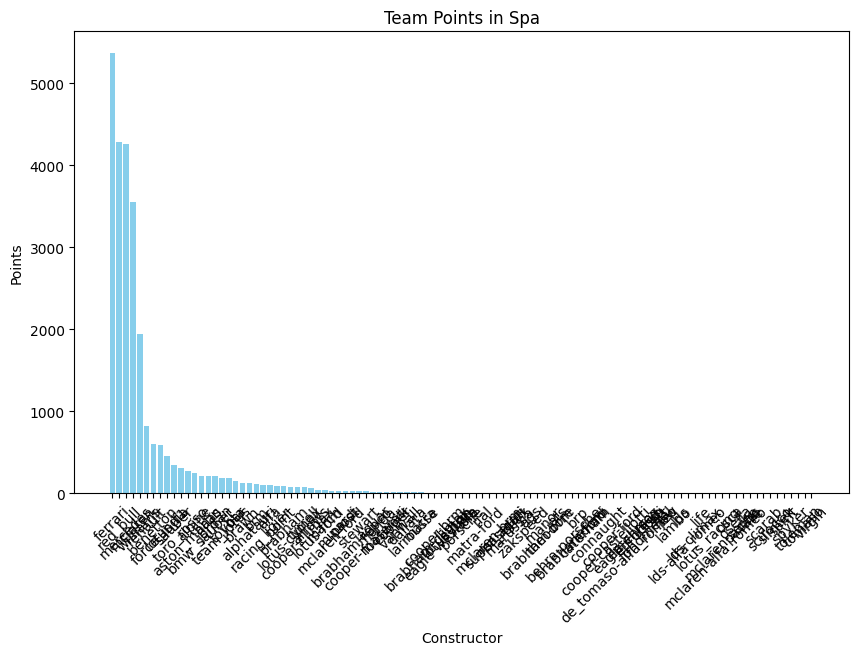

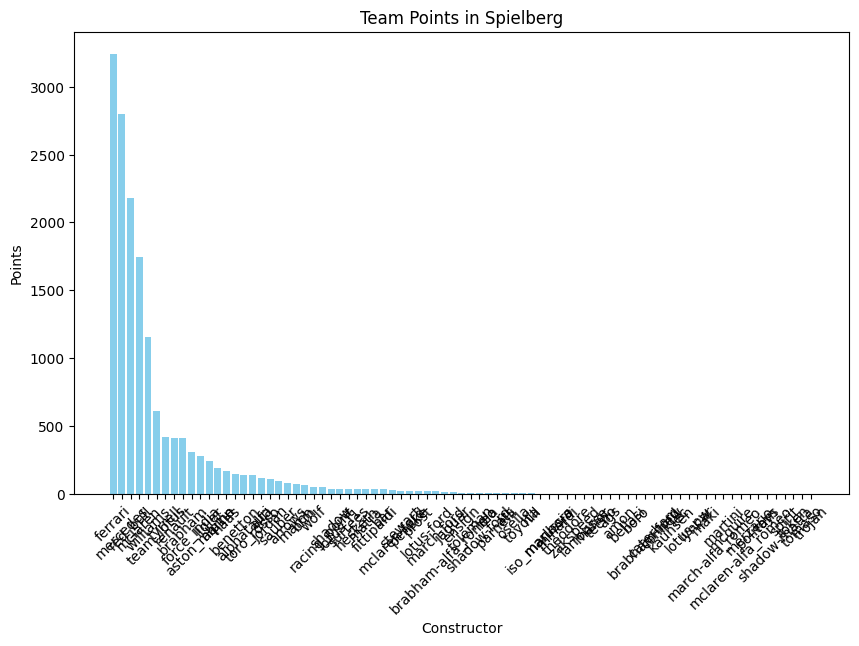

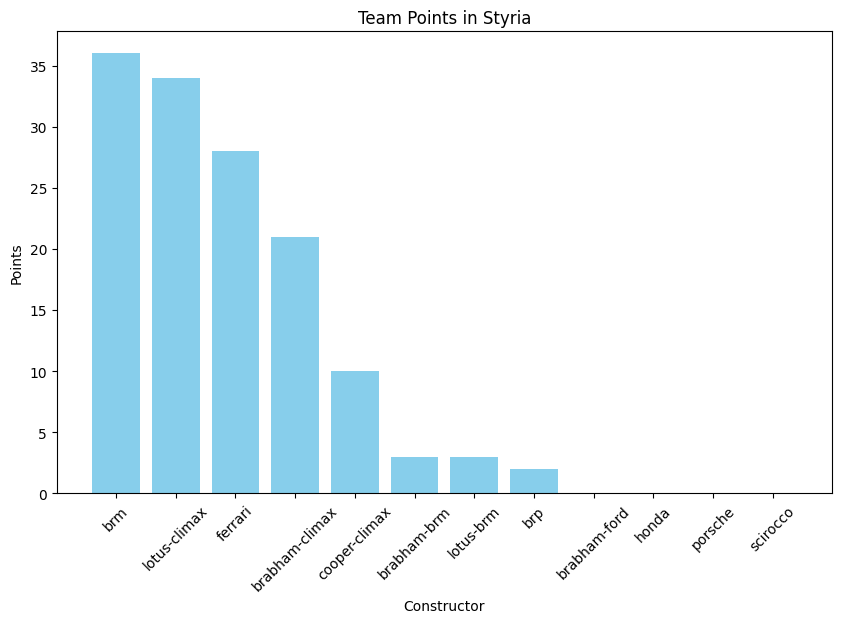

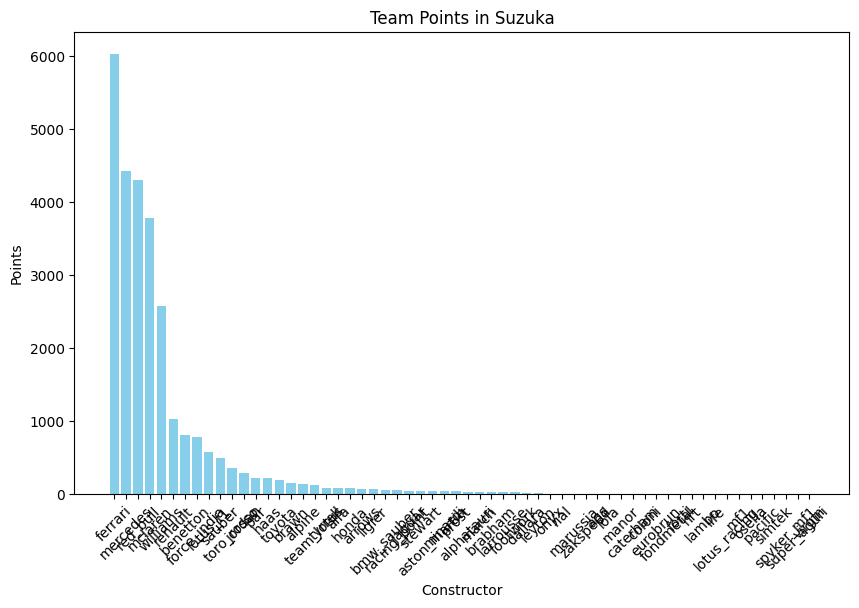

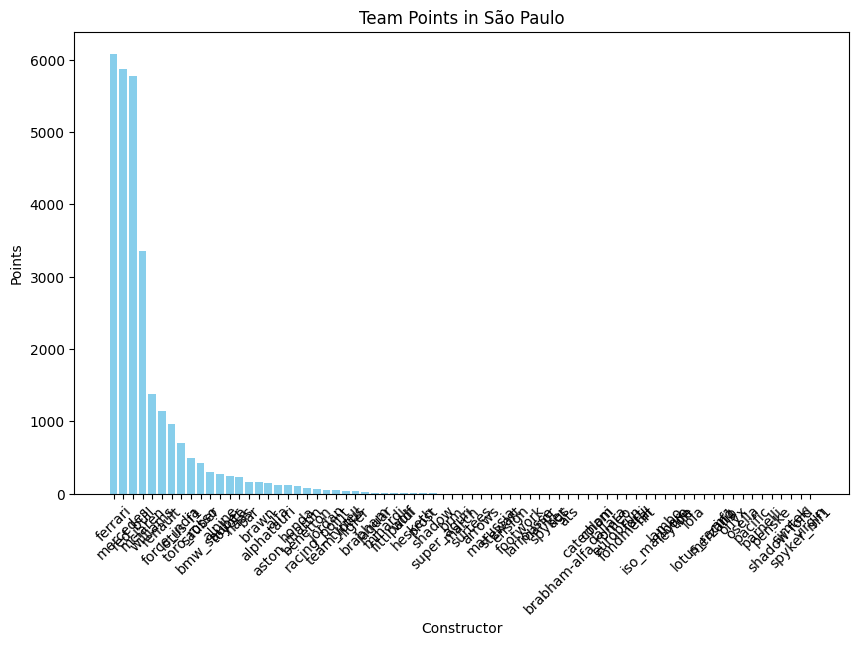

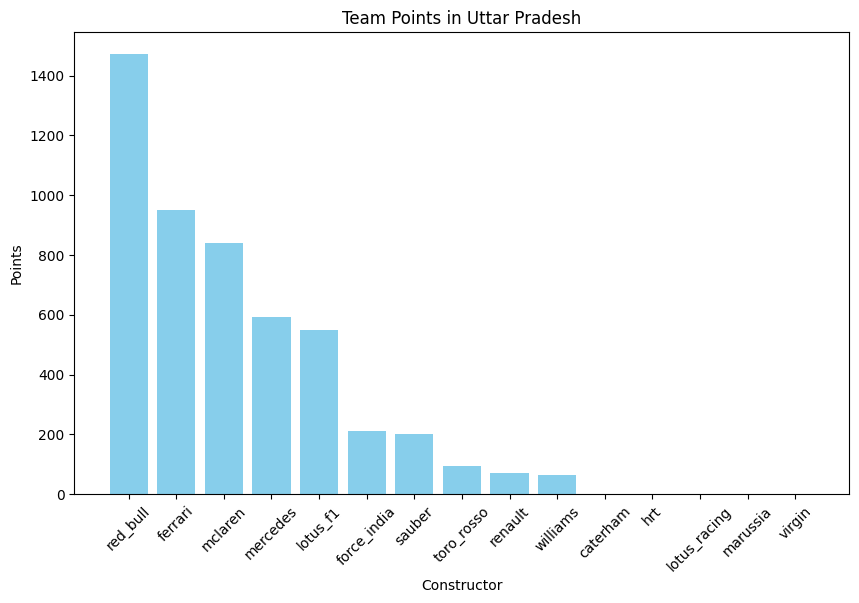

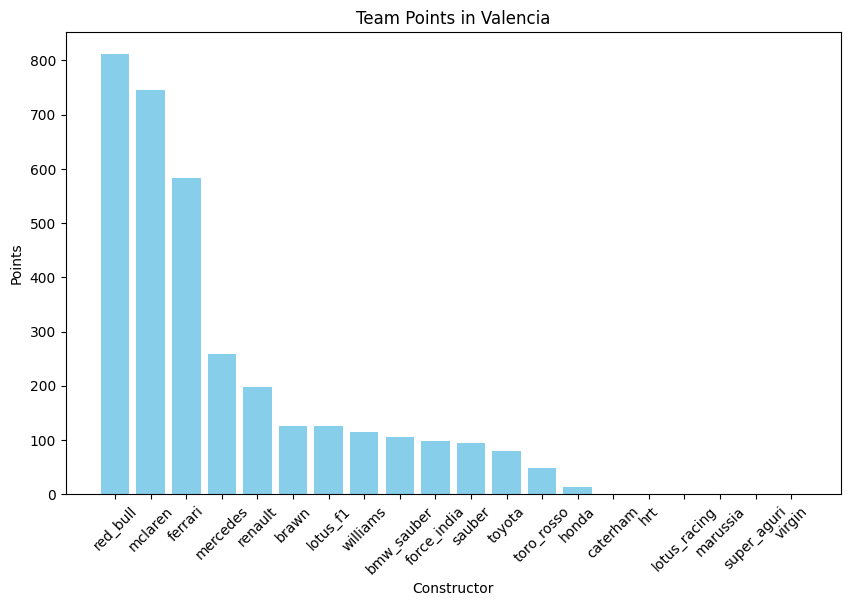

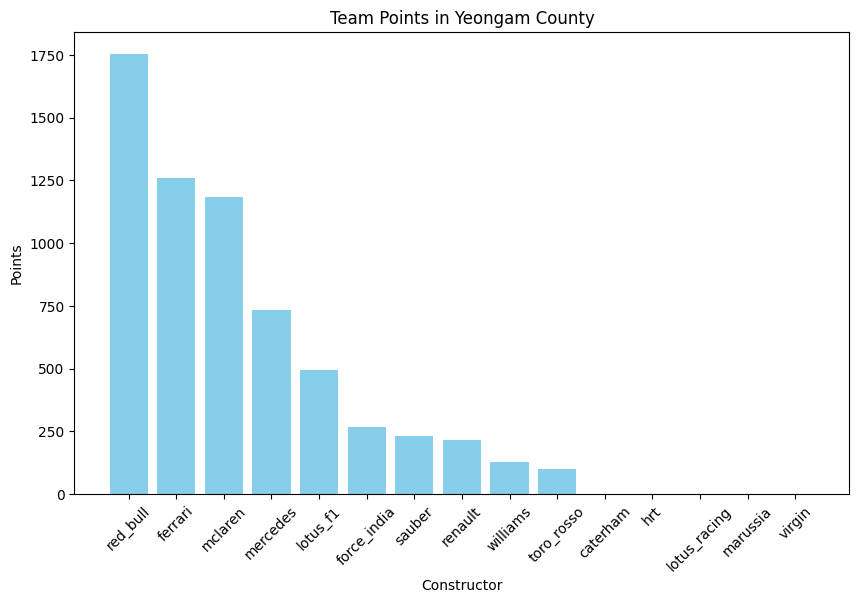

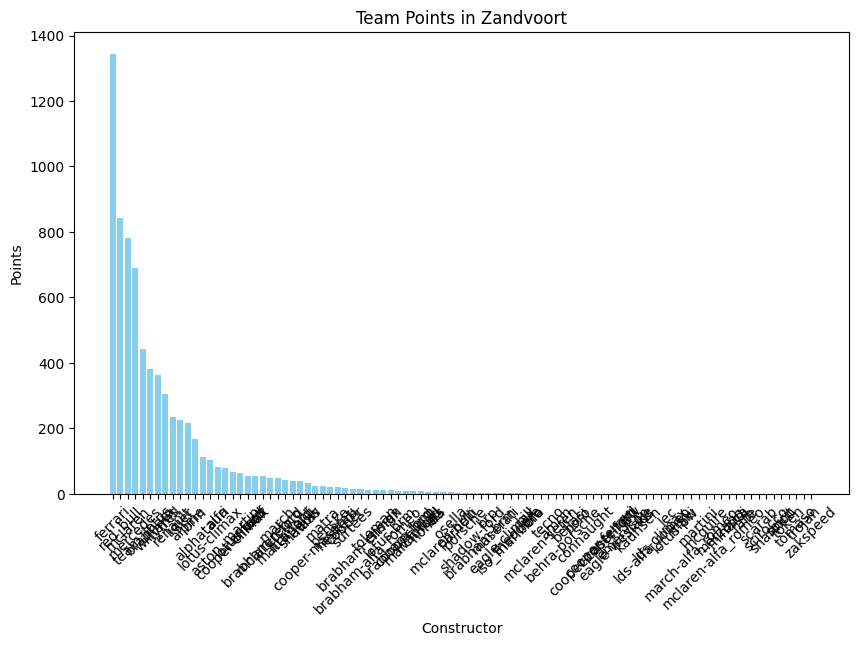

In [82]:
grouped = plot_points_2.groupby(['location', 'constructorRef'])['points'].sum().reset_index()
grouped_sorted = grouped.sort_values(['location', 'points'], ascending=[True, False])
unique_locations = grouped_sorted['location'].unique()

# Create a plot for each location.
for location in unique_locations:
    # Filter the data for the current location.
    data = grouped_sorted[grouped_sorted['location'] == location]
    
    # Create a figure.
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot.
    plt.bar(data['constructorRef'], data['points'], color='skyblue')
    
    # Set the title and labels for the plot.
    plt.title(f'Team Points in {location}')
    plt.xlabel('Constructor')
    plt.ylabel('Points')
    
    # Rotate the x-axis constructor labels for better readability.
    plt.xticks(rotation=45)
    
    # Show the plot.
    plt.show()

## driver_standings, drivers

In [28]:
driver_standings = pd.read_csv(root+'driver_standings.csv')

In [29]:
driver_standings.shape

(34124, 7)

In [30]:
driver_standings.head()

driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0
4                  5      18         5     4.0         5            5     0

In [31]:
drivers = pd.read_csv(root+'drivers.csv')

In [32]:
drivers.shape

(857, 9)

In [33]:
drivers.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [34]:
drivers_merged = pd.merge(driver_standings, drivers, on='driverId')

In [35]:
drivers_merged.shape

(34124, 15)

In [36]:
drivers_merged.head()

driverStandingsId  raceId  driverId  points  position positionText  wins  \
0                  1      18         1    10.0         1            1     1   
1                  9      19         1    14.0         1            1     1   
2                 27      20         1    14.0         3            3     1   
3                 48      21         1    20.0         2            2     1   
4                 69      22         1    28.0         3            3     1   

  driverRef number code forename   surname         dob nationality  \
0  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
1  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
2  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
3  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
4  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   

                                           url  
0  http://en.wikipedia.org/wiki/Lewis_Hamilton  
1  http://en.wikipedia.org/wiki/Lewis_Hamilton  
2  http://en.wikipedia.org/wiki/Lewis_Hamilton  
3  http://en.wikipedia.org/wiki/Lewis_Hamilton  
4  http://en.wikipedia.org/wiki/Lewis_Hamilton

In [98]:
top_drivers_by_points = drivers_merged.groupby('forename')['points'].sum().sort_values(ascending=False).head(10)
top_drivers_by_points

forename
Lewis        46550.5
Sebastian    32026.0
Max          22486.5
Nico         22082.0
Fernando     21692.0
Valtteri     19458.0
Kimi         19069.0
Michael      14563.0
Sergio       13770.0
Daniel       13626.0
Name: points, dtype: float64

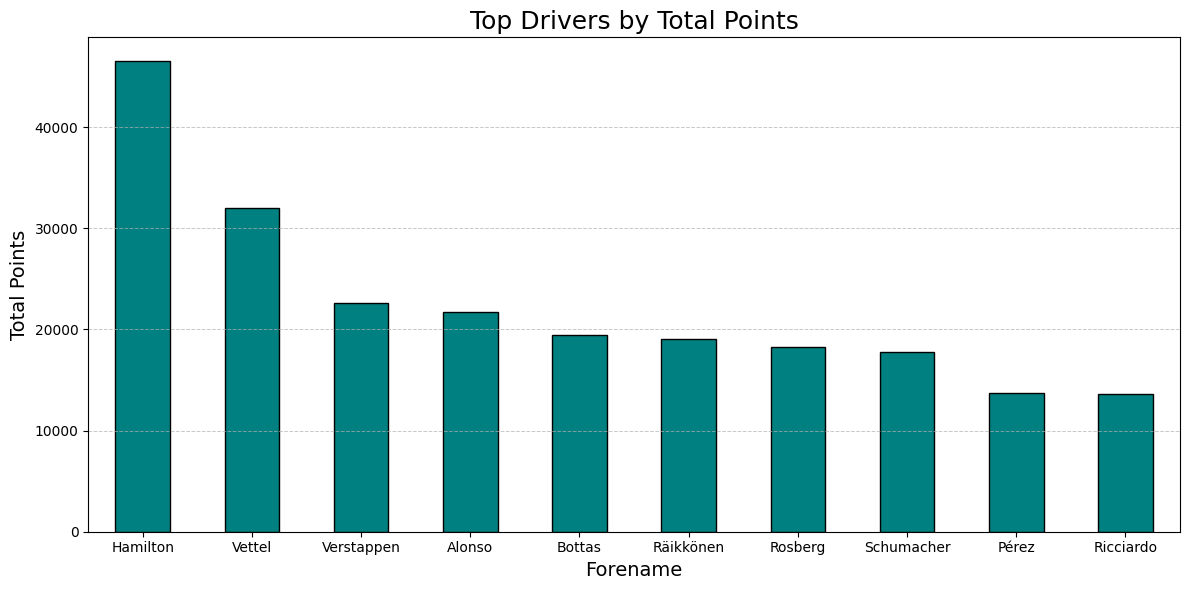

In [91]:
plt.figure(figsize=(12, 6))
top_drivers_by_points.plot(kind='bar', color='teal', edgecolor='black')

# Adding enhancements to the plot.
plt.title('Top Drivers by Total Points', fontsize=18)
plt.xlabel('Forename', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Show the plot.
plt.show()

> 6 of the 10 drivers here are still racing <br>
> vettel , Raikkonen, rosberg and schumacher are retired <br>
> All of these drivers mainly raced for teams ferrari , mercedes and red bull <br>
> ham, bot, ros got most of the points at mercedes and vettel verstappen peres ricciardo at read bull and rest at ferrari <br> 

In [97]:
drivers_merged.wins.value_counts()

0     30074
1      2057
2       850
3       417
4       245
5       170
6       127
7        62
8        37
9        37
10       21
11       14
12        6
13        4
14        2
15        1
Name: wins, dtype: int64

In [39]:
top_drivers_by_wins = drivers_merged.groupby('surname')['wins'].sum().sort_values(ascending=False).head(10)
top_drivers_by_wins

driverId
1      1019
30      849
20      517
117     472
830     419
102     394
4       346
3       269
95      258
182     224
Name: wins, dtype: int64

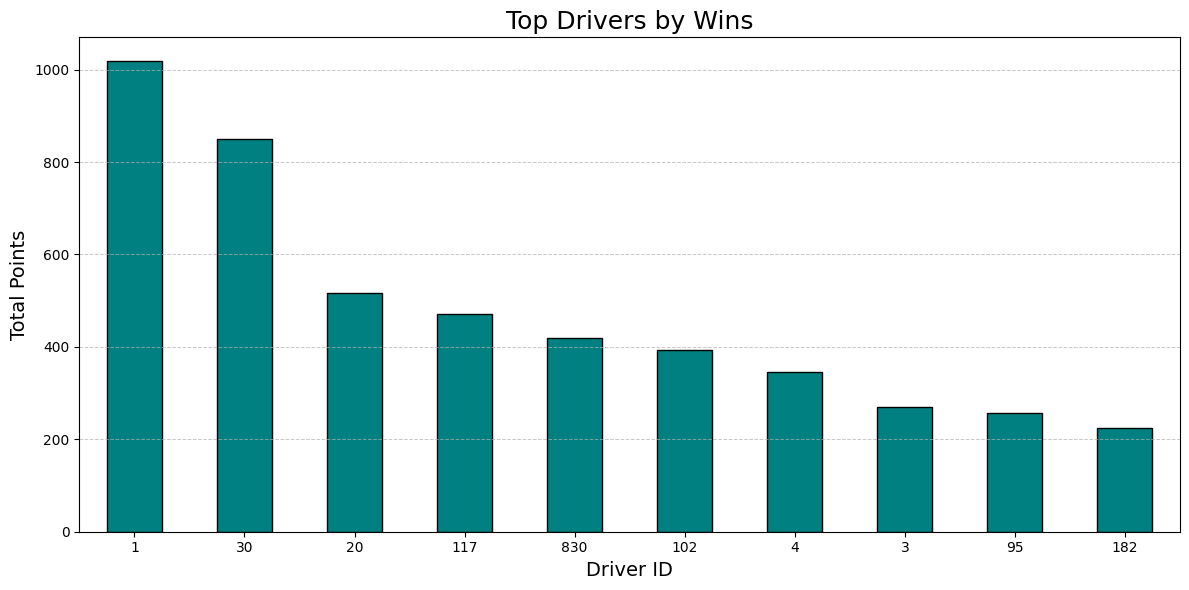

In [40]:
plt.figure(figsize=(12, 6))
top_drivers_by_wins.plot(kind='bar', color='teal', edgecolor='black')

# Adding enhancements to the plot.
plt.title('Top Drivers by Wins', fontsize=18)
plt.xlabel('Driver ID', fontsize=14)
plt.ylabel('Total Wins', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Show the plot.
plt.show()

In [41]:
nationality_counts = drivers_merged['nationality'].value_counts()

In [42]:
nationality_counts

British              5855
Italian              4147
American             3848
French               3537
German               2722
Brazilian            2063
Finnish              1180
Spanish               994
Australian            962
Belgian               866
Austrian              825
Japanese              686
Swedish               643
Argentine             640
Dutch                 640
Swiss                 639
South African         604
New Zealander         501
Canadian              495
Mexican               465
Danish                233
Russian               218
Monegasque            193
Colombian             146
Rhodesian             141
Venezuelan            137
Irish                 118
Portuguese            110
Polish                105
Thai                  102
Indian                 86
Chilean                46
Chinese                34
Uruguayan              33
Indonesian             21
Liechtensteiner        20
Hungarian              20
Malaysian              18
East German 

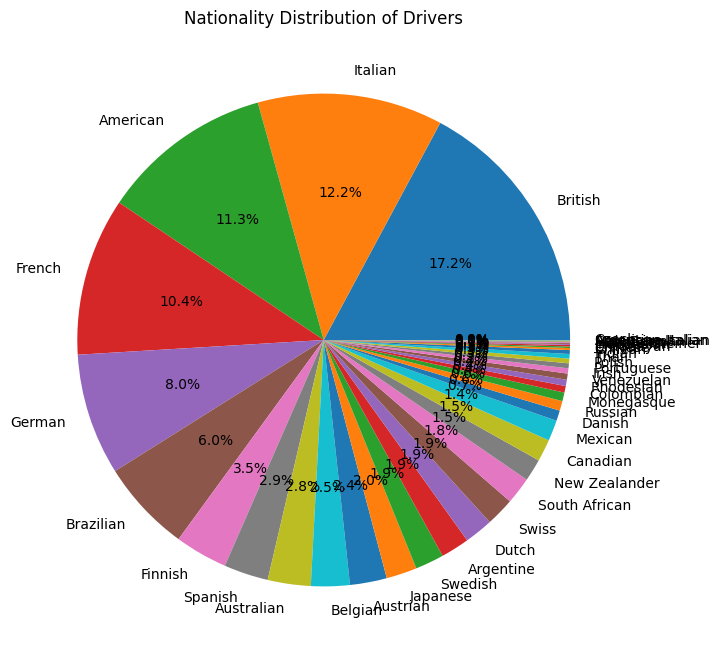

In [43]:
# Plotting the pie chart
plt.figure(figsize=(10, 8))
nationality_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Nationality Distribution of Drivers')
plt.ylabel('')  # Hiding the y-label as it is not needed in pie charts
plt.show()

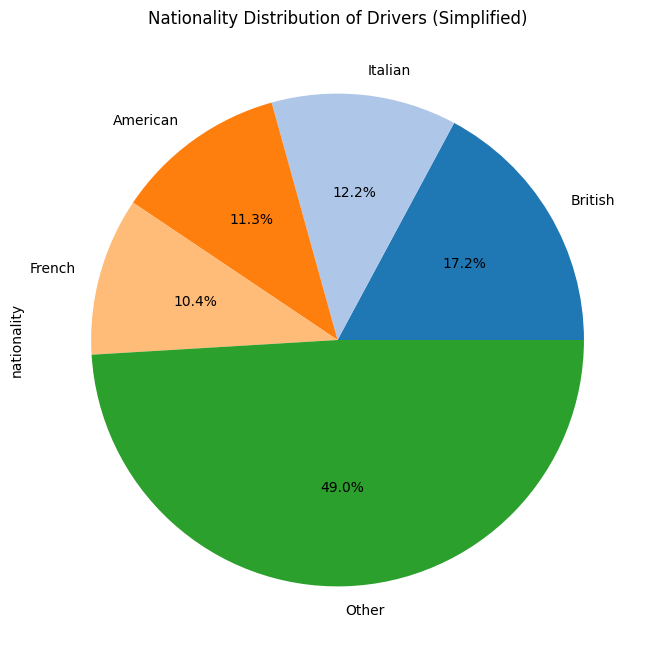

In [44]:
threshold = 0.10 * drivers_merged.shape[0] 
other_nationalities = nationality_counts[nationality_counts < threshold]
nationality_counts = nationality_counts[nationality_counts >= threshold]
nationality_counts['Other'] = other_nationalities.sum()
plt.figure(figsize=(10, 8))
nationality_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Nationality Distribution of Drivers (Simplified)')
plt.show()